# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Clasificación

#### Valoración máxima: 6 puntos 

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>DAVID MUÑOZ SÁNCHEZ</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos. 



Lo primero a tener en cuenta: se nos da el DataSet en varias partes. Por así decirlo, hay uno completo, y otro para el cuál las etiquetas vienen separadas. Estos dos últimos se uniran por columnas y el conjunto resultante se unirá por filas al primero.

In [98]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

etiq_data2 = pd.read_csv("drive/MyDrive/Colab Notebooks/datos/tictgts2000.txt", sep=' ', low_memory=False, header=None)
data2 = pd.read_csv("drive/MyDrive/Colab Notebooks/datos/ticeval2000.txt", sep='\t', low_memory=False, header=None)
data1 = pd.read_csv("drive/MyDrive/Colab Notebooks/datos/ticdata2000.txt", sep='\t', low_memory=False, header=None)

etiq_data2[85] = etiq_data2[0]
del etiq_data2[0]

resultado1 = pd.concat([data2, etiq_data2], axis=1)

resultado = pd.concat([data1,resultado1],axis=0)

resultado


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,1,0,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,0,0,0,1,0,0,0,0,0,1
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,1,0,0,0,1,0,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#ahora hay que ver valores faltantes

print(resultado.to_numpy().dtype)

def verificar_nan(dataset):
    if dataset.isnull().values.any():
        print("El dataset contiene valores NaN")
    else:
        print("El dataset no contiene valores NaN")
def verificar_inf(dataset):
    if dataset.isin([float('inf'), float('-inf')]).any().any():
        print("El dataset contiene valores infinitos")
    else:
        print("El dataset no contiene valores infinitos")
verificar_inf(resultado)
verificar_nan(resultado)

int64
El dataset no contiene valores infinitos
El dataset no contiene valores NaN


Todas son numéricas en el sentido del formato y se puede asegurar que no hay ningún valor faltante, porque lo dice la documentación, y por la prueba del tipo que se acaba de hacer.

A continuación, se indica, una a una, que significa cada columna del dataset, con objeto de transformarlas si son categóricas usando alguna técnica acorde a la información que muestren.


DATA DICTIONARY

Nr Name Description Domain
+ 1 MOSTYPE Customer Subtype see **L0**
+ 2 MAANTHUI Number of houses 1 – 10 
+ 3 MGEMOMV Avg size household 1 – 6 
+ 4 MGEMLEEF Avg age see **L1**
+ 5 MOSHOOFD Customer main type see **L2**
+ 6 MGODRK Roman catholic see **L3**
+ 7 MGODPR Protestant ... 
+ 8 MGODOV Other religion 
+ 9 MGODGE No religion 
+ 10 MRELGE Married 
+ 11 MRELSA Living together 
+ 12 MRELOV Other relation 
+ 13 MFALLEEN Singles
+ 14 MFGEKIND Household without children 
+ 15 MFWEKIND Household with children 
+ 16 MOPLHOOG High level education 
+ 17 MOPLMIDD Medium level education 
+ 18 MOPLLAAG Lower level education 
+ 19 MBERHOOG High status 
+ 20 MBERZELF Entrepreneur 
+ 21 MBERBOER Farmer 
+ 22 MBERMIDD Middle management 
+ 23 MBERARBG Skilled labourers 
+ 24 MBERARBO Unskilled labourers 
+ 25 MSKA Social class A 
+ 26 MSKB1 Social class B1 
+ 27 MSKB2 Social class B2 
+ 28 MSKC Social class C
+ 29 MSKD Social class D
+ 30 MHHUUR Rented house
+ 31 MHKOOP Home owners 
+ 32 MAUT1 1 car 
+ 33 MAUT2 2 cars 
+ 34 MAUT0 No car 
+ 35 MZFONDS National Health Service 
+ 36 MZPART Private health insurance 
+ 37 MINKM30 Income < 30.000 
+ 38 MINK3045 Income 30-45.000
+ 39 MINK4575 Income 45-75.000 
+ 40 MINK7512 Income 75-122.000 
+ 41 MINK123M Income >123.000 
+ 42 MINKGEM Average income 
+ 43 MKOOPKLA Purchasing power class
+ 44 PWAPART Contribution private third party insurance see L4
+ 45 PWABEDR Contribution third party insurance (firms) ... 
+ 46 PWALAND Contribution third party insurane (agriculture) 
+ 47 PPERSAUT Contribution car policies 
+ 48 PBESAUT Contribution delivery van policies 
+ 49 PMOTSCO Contribution motorcycle/scooter policies 
+ 50 PVRAAUT Contribution lorry policies 
+ 51 PAANHANG Contribution trailer policies 
+ 52 PTRACTOR Contribution tractor policies 
+ 53 PWERKT Contribution agricultural machines policies 
+ 54 PBROM Contribution moped policies 
+ 55 PLEVEN Contribution life insurances 
+ 56 PPERSONG Contribution private accident insurance policies 
+ 57 PGEZONG Contribution family accidents insurance policies 
+ 58 PWAOREG Contribution disability insurance policies 
+ 59 PBRAND Contribution fire policies
+ 60 PZEILPL Contribution surfboard policies 
+ 61 PPLEZIER Contribution boat policies
+ 62 PFIETS Contribution bicycle policies 
+ 63 PINBOED Contribution property insurance policies 
+ 64 PBYSTAND Contribution social security insurance policies 
+ 65 AWAPART Number of private third party insurance 1 - 12 
+ 66 AWABEDR Number of third party insurance (firms) ... 
+ 67 AWALAND Number of third party insurane (agriculture) 
+ 68 APERSAUT Number of car policies 
+ 69 ABESAUT Number of delivery van policies 
+ 70 AMOTSCO Number of motorcycle/scooter policies 
+ 71 AVRAAUT Number of lorry policies 
+ 72 AAANHANG Number of trailer policies 
+ 73 ATRACTOR Number of tractor policies 
+ 74 AWERKT Number of agricultural machines policies 
+ 75 ABROM Number of moped policies 
+ 76 ALEVEN Number of life insurances 
+ 77 APERSONG Number of private accident insurance policies 
+ 78 AGEZONG Number of family accidents insurance policies
+ 79 AWAOREG Number of disability insurance policies 
+ 80 ABRAND Number of fire policies 
+ 81 AZEILPL Number of surfboard policies 
+ 82 APLEZIER Number of boat policies 
+ 83 AFIETS Number of bicycle policies 
+ 84 AINBOED Number of property insurance policies 
+ 85 ABYSTAND Number of social security insurance policies
+ 86 CARAVAN Number of mobile home policies 0 - 1 

L0:

Value Label
+ 1 High Income, expensive child
+ 2 Very Important Provincials
+ 3 High status seniors
+ 4 Affluent senior apartments
+ 5 Mixed seniors
+ 6 Career and childcare
+ 7 Dinki's (double income no kids)
+ 8 Middle class families
+ 9 Modern, complete families
+ 10 Stable family
+ 11 Family starters
+ 12 Affluent young families
+ 13 Young all american family
+ 14 Junior cosmopolitan
+ 15 Senior cosmopolitans
+ 16 Students in apartments
+ 17 Fresh masters in the city
+ 18 Single youth
+ 19 Suburban youth
+ 20 Etnically diverse
+ 21 Young urban have-nots
+ 22 Mixed apartment dwellers
+ 23 Young and rising
+ 24 Young, low educated 
+ 25 Young seniors in the city
+ 26 Own home elderly
+ 27 Seniors in apartments
+ 28 Residential elderly
+ 29 Porchless seniors: no front yard
+ 30 Religious elderly singles
+ 31 Low income catholics
+ 32 Mixed seniors
+ 33 Lower class large families
+ 34 Large family, employed child
+ 35 Village families
+ 36 Couples with teens 'Married with children'
+ 37 Mixed small town dwellers
+ 38 Traditional families
+ 39 Large religous families
+ 40 Large family farms
+ 41 Mixed rurals

L1:

+ 1 20-30 years
+ 2 30-40 years
+ 3 40-50 years
+ 4 50-60 years
+ 5 60-70 years
+ 6 70-80 years


L2:

+ 1 Successful hedonists
+ 2 Driven Growers
+ 3 Average Family
+ 4 Career Loners
+ 5 Living well
+ 6 Cruising Seniors
+ 7 Retired and Religeous
+ 8 Family with grown ups
+ 9 Conservative families
+ 10 Farmers


L3:

+ 0 0%
+ 1 1 - 10%
+ 2 11 - 23%
+ 3 24 - 36%
+ 4 37 - 49%
+ 5 50 - 62%
+ 6 63 - 75%
+ 7 76 - 88%
+ 8 89 - 99%
+ 9 100%


L4:

+ 0 f 0
+ 1 f 1 – 49
+ 2 f 50 – 99
+ 3 f 100 – 199
+ 4 f 200 – 499
+ 5 f 500 – 999
+ 6 f 1000 – 4999
+ 7 f 5000 – 9999
+ 8 f 10.000 - 19.999
+ 9 f 20.000 - ?



FUENTE DE ESTA INFORMACIÓN: https://github.com/tezzytezzy/caravan-insurance-policy/blob/master/dictionary.txt

In [100]:
for i in resultado.columns:
  print("Columna: ", i, ", Enteros que la conforman: ", np.unique(resultado[i]))

Columna:  0 , Enteros que la conforman:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Columna:  1 , Enteros que la conforman:  [ 1  2  3  4  5  6  7  8 10]
Columna:  2 , Enteros que la conforman:  [1 2 3 4 5 6]
Columna:  3 , Enteros que la conforman:  [1 2 3 4 5 6]
Columna:  4 , Enteros que la conforman:  [ 1  2  3  4  5  6  7  8  9 10]
Columna:  5 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  6 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  7 , Enteros que la conforman:  [0 1 2 3 4 5]
Columna:  8 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  9 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  10 , Enteros que la conforman:  [0 1 2 3 4 5 6 7]
Columna:  11 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  12 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  13 , Enteros que la conforman:  [0 1 2 3 4 5 6 7 8 9]
Columna:  14 , Enteros q

Se cuenta con un DataSet mixto. Según el diccionario, las columnas númericas son la 1, 2 y desde la 64 a la 84.

Por otra parte, las demás columnas son categóricas, y están codificadas según ciertos valores.

Con los valores de L0 tenemos a la columna 0.

Con los valores L1 tenemos a la columna 3.

Con los valores L2 tenemos a la columna 4.

Con los valores L3 tenemos desde la columna  5 a la 42.

Con los valores L4 tenemos desde la columna 43 a la 63.

La cuestión que va a ser discutida más adelante, es si, las columnas categóricas van a ser transformadas con one-hot o se trasnformarán según otro método.

#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos. 

Tras el análisis detalaldo del DataSet hecho anteriormente, se pueden determinar fácilmente los elementos del problema que nos compete.

**X** sería el conjunto de filas del dataset sin tener en cuenta la última columna, que es el objetivo. Cada fila de X consta de 85 columnas, representando información de forma numérica (con enteros) o con información categórica según el grupo de columnas, para las cuales se pensará una transformación más adelante.

**Y** sería la variable objetivo. En este caso queremos clasificar si dado un caso de X, este tendrá o no tendrá poliza.

**f** es la función desconocida para nosotros que asigna a cada elemento de X su correspondiente etiqueta en Y de forma correcta. Esta es la función que se pretende estimar.

Hay una regla principal para evitar malas prácticas como el data snooping, que es dividir el conjunto de Test antes de extraer cualquier tipo de información de los datos, y no tocarlo más hasta finalizar el entrenamiento, para usarlo únicamente para estimar el Eout, sin que influya en ningún momento (directa ni indirectamente) en nuestro entrenamiento. Así pues, vamos a dividirlo ya y a almacenarlo en una variable diferente que no se volverá a tocar hasta entonces.

In [101]:
from sklearn.model_selection import train_test_split

pd_data = resultado.drop(resultado.columns[-1], axis=1)
pd_labels = resultado[85]

X_train, X_test, y_train, y_test = train_test_split(pd_data, pd_labels, test_size=0.20, random_state=33)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (7857, 85) (7857,)
Test:  (1965, 85) (1965,)


Dado que tampoco se dispone de una cantidad exagerada de datos, se ha optado por un tamaño de un 20% del DataSet para Test, dado que necesitamos un valor Eout confiable en base a los 9000 datos que se tienen de partida.

Se va a realizar un análisis de la relación entre los diferentes atributos y la salida en busca de patrones y correlaciones. Este análisis nos ayudará a comprender cómo están relacionados entre sí y cómo se correlacionan con la variable de salida. Esta información será útil en el proceso de preprocesamiento de los datos. Además, podremos extraer estadísticas que nos permitan identificar comportamientos anómalos o consideraciones importantes.

El objetivo principal de este análisis es determinar si existen patrones o comportamientos específicos en los datos que debamos tener en cuenta durante el preprocesamiento. Por ejemplo, si una variable muestra un comportamiento sinusoidal, podríamos aplicar una transformación seno-coseno. Si una variable se encuentra dentro de un rango pequeño y constante, podríamos evitar la normalización o utilizar un método de normalización adecuado. También podemos identificar variables que sean independientes de la variable de salida y que podrían eliminarse del conjunto de datos.

Lo primero será mostrar el porcentaje de 1's y 0's que hay en nuestras etiquetas, para lo cual se usará la típica gráfica coloquialmente conocida como de "quesitos".

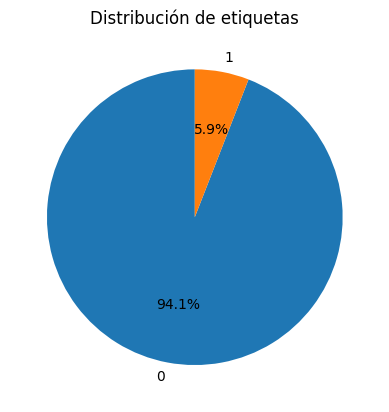

In [102]:

# Vector de etiquetas
etiquetas = [0,1]

# Valores para cada etiqueta
y = y_train.to_numpy()
valores = [len(np.where(y==0)[0]), len(np.where(y==1)[0])]
# Crear la gráfica de quesos
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)

# Añadir un título
plt.title('Distribución de etiquetas')

# Mostrar la gráfica
plt.show()

Como se puede observar, nuestros datos estan muy desbalanceados, esto es un gran problema, pues nubla mucho el verdadero buen funcionamiento de un algoritmo. Por ejemplo, un clasificador que siempre clasifique como '0', ya tendría un 94% de aciertos. Esto es, realmente, natural. No podemos esperar una partición equitativa de los datos, menos aún en un caso como este, donde es lógico que el porcentaje de clientes que tienen un cierto tipo de póliza es muy bajo. Así pues, esto nos indica simplemente que tendremos que ir con mucho ojo analizando los resultados, teniendo en cuenta esta información, evitando caer en falsas conclusiones y verificando que nuestra solución verdaderamente está intentando predecir, y no solo usando la estadística a su favor. Este apartado se abordará más detenidamente cuando se seleccionen las métricas a usar para el problema.

Lo segundo será mostrar una gráfica acerca de 5 de las columnas categóricas que hay en el dataset. Mostrarlas todas sería muy extenso y tedioso para el lector, así que se imprime una de cada tipo.

In [103]:
def display_categorico(data, labels, clase1, clase2, title='', categorias=[]):
  atributo = data.columns[0]
  data = np.array(data).flatten()
  labels = np.array(labels)
  valores = np.unique(data)
  print('Los valores que tiene este atributo son: ', valores)
  print()  

  if len(categorias) > 0 : valores = np.array(categorias)

  num_valor = np.zeros_like(valores, dtype=np.int_)
  for i in range(len(valores)):
    num_valor[i] = np.count_nonzero(data == valores[i])

  data_clase1 = np.array([data[i] for i, xi in enumerate(data) if labels[i] == clase1])
  data_clase2 = np.array([data[i] for i, xi in enumerate(data) if labels[i] == clase2])

  num_clase1 = data_clase1.shape[0]
  num_clase2 = data_clase2.shape[0]


  print('Para cada atributo: la cantidad de ', clase1, ' y la cantidad de ', clase2, ', así como sus porcentajes:')
  x_clase1 = np.zeros_like(valores, dtype=np.float64)
  x_clase2 = np.zeros_like(valores, dtype=np.float64)
  for i in range(len(x_clase1)):
    x_clase1[i] = np.count_nonzero(data_clase1 == valores[i])/num_valor[i]
    x_clase2[i] = np.count_nonzero(data_clase2 == valores[i])/num_valor[i]
    print(valores[i], ': ', np.count_nonzero(data_clase1 == valores[i]),' (un ', x_clase1[i]*100, '%) de ', clase1, 'y ', np.count_nonzero(data_clase2 == valores[i]), ' (un ', x_clase2[i]*100, '%) de ', clase2)
  print()


  y = valores
  fig,ax = plt.subplots()
  ax.plot(x_clase1, y, 'r-', markersize=10, label = clase1)
  ax.plot(x_clase2, y, 'b-', markersize=10, label = clase2)
  ax.legend()
  ax.set(title=title)
  ax.set_xlabel('Porcentaje de la Población')
  ax.set_ylabel(atributo);

  plt.show()

Los valores que tiene este atributo son:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]

Para cada atributo: la cantidad de  0  y la cantidad de  1 , así como sus porcentajes:
1 :  154  (un  87.00564971751412 %) de  0 y  23  (un  12.994350282485875 %) de  1
2 :  102  (un  91.8918918918919 %) de  0 y  9  (un  8.108108108108109 %) de  1
3 :  322  (un  93.6046511627907 %) de  0 y  22  (un  6.395348837209303 %) de  1
4 :  73  (un  97.33333333333334 %) de  0 y  2  (un  2.666666666666667 %) de  1
5 :  56  (un  96.55172413793103 %) de  0 y  2  (un  3.4482758620689653 %) de  1
6 :  142  (un  86.06060606060606 %) de  0 y  23  (un  13.939393939393941 %) de  1
7 :  51  (un  92.72727272727272 %) de  0 y  4  (un  7.2727272727272725 %) de  1
8 :  383  (un  86.45598194130926 %) de  0 y  60  (un  13.544018058690746 %) de  1
9 :  356  (un  97.26775956284153 %) de  0 y  10  (un  2.73224043715847 %) de  1
10 :  195  (un  91.9811

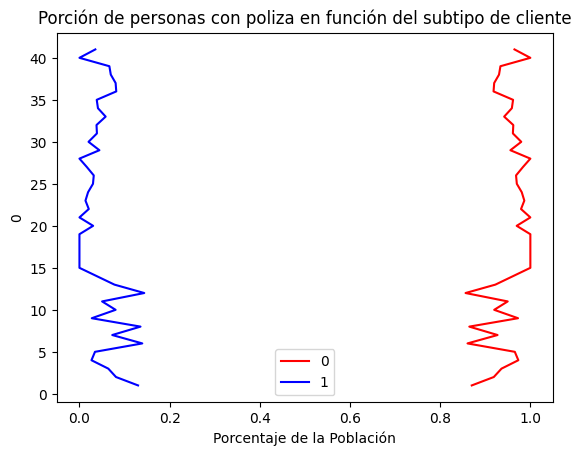

In [104]:
display_categorico(X_train[[0]], y_train, 0, 1, 'Porción de personas con poliza en función del subtipo de cliente' )

Los valores que tiene este atributo son:  [1 2 3 4 5 6]

Para cada atributo: la cantidad de  0  y la cantidad de  1 , así como sus porcentajes:
1 :  81  (un  98.78048780487805 %) de  0 y  1  (un  1.2195121951219512 %) de  1
2 :  1777  (un  93.4279705573081 %) de  0 y  125  (un  6.572029442691902 %) de  1
3 :  3932  (un  94.24736337488015 %) de  0 y  240  (un  5.752636625119846 %) de  1
4 :  1319  (un  93.87900355871886 %) de  0 y  86  (un  6.120996441281139 %) de  1
5 :  244  (un  95.3125 %) de  0 y  12  (un  4.6875 %) de  1
6 :  39  (un  97.5 %) de  0 y  1  (un  2.5 %) de  1



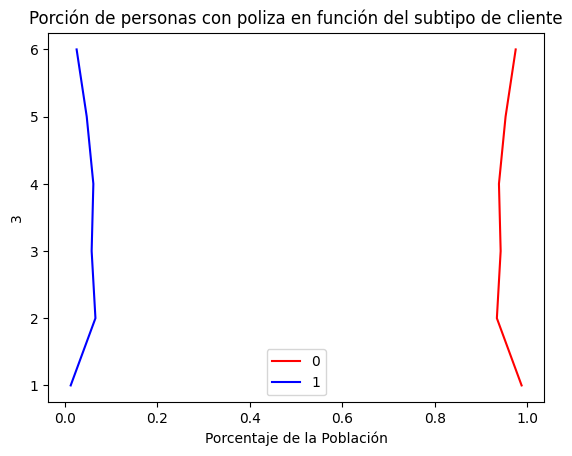

In [105]:
display_categorico(X_train[[3]], y_train, 0, 1, 'Porción de personas con poliza en función del subtipo de cliente' )

Los valores que tiene este atributo son:  [ 1  2  3  4  5  6  7  8  9 10]

Para cada atributo: la cantidad de  0  y la cantidad de  1 , así como sus porcentajes:
1 :  707  (un  92.41830065359477 %) de  0 y  58  (un  7.5816993464052285 %) de  1
2 :  576  (un  86.87782805429865 %) de  0 y  87  (un  13.122171945701359 %) de  1
3 :  1110  (un  93.35576114381834 %) de  0 y  79  (un  6.644238856181666 %) de  1
4 :  60  (un  100.0 %) de  0 y  0  (un  0.0 %) de  1
5 :  750  (un  98.2961992136304 %) de  0 y  13  (un  1.7038007863695939 %) de  1
6 :  255  (un  97.70114942528735 %) de  0 y  6  (un  2.2988505747126435 %) de  1
7 :  680  (un  96.45390070921985 %) de  0 y  25  (un  3.546099290780142 %) de  1
8 :  2045  (un  94.15285451197053 %) de  0 y  127  (un  5.847145488029466 %) de  1
9 :  823  (un  93.20498301245753 %) de  0 y  60  (un  6.795016987542468 %) de  1
10 :  386  (un  97.47474747474747 %) de  0 y  10  (un  2.525252525252525 %) de  1



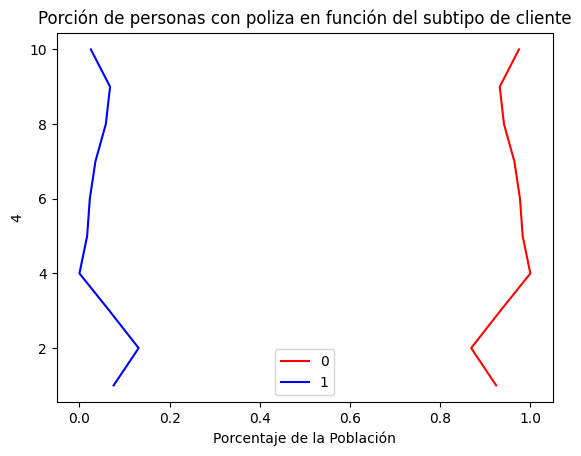

In [106]:
display_categorico(X_train[[4]], y_train, 0, 1, 'Porción de personas con poliza en función del subtipo de cliente' )

Los valores que tiene este atributo son:  [0 1 2 3 4 5 6 7 8 9]

Para cada atributo: la cantidad de  0  y la cantidad de  1 , así como sus porcentajes:
0 :  4111  (un  94.54921803127874 %) de  0 y  237  (un  5.450781968721251 %) de  1
1 :  2036  (un  93.65225390984361 %) de  0 y  138  (un  6.347746090156393 %) de  1
2 :  906  (un  92.54341164453524 %) de  0 y  73  (un  7.456588355464761 %) de  1
3 :  190  (un  95.0 %) de  0 y  10  (un  5.0 %) de  1
4 :  93  (un  96.875 %) de  0 y  3  (un  3.125 %) de  1
5 :  24  (un  96.0 %) de  0 y  1  (un  4.0 %) de  1
6 :  16  (un  88.88888888888889 %) de  0 y  2  (un  11.11111111111111 %) de  1
7 :  6  (un  85.71428571428571 %) de  0 y  1  (un  14.285714285714285 %) de  1
8 :  3  (un  100.0 %) de  0 y  0  (un  0.0 %) de  1
9 :  7  (un  100.0 %) de  0 y  0  (un  0.0 %) de  1



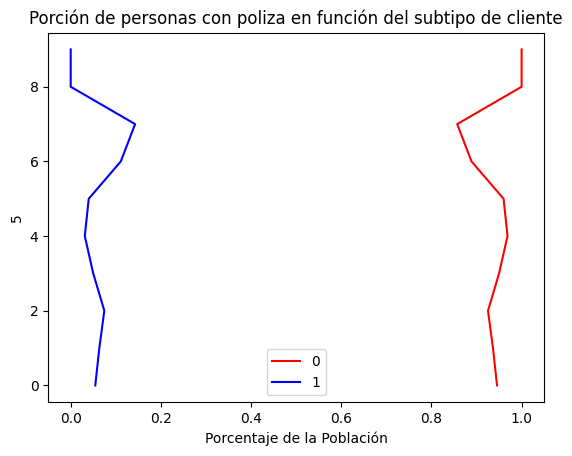

In [107]:
display_categorico(X_train[[5]], y_train, 0, 1, 'Porción de personas con poliza en función del subtipo de cliente' )

Los valores que tiene este atributo son:  [0 1 2 3]

Para cada atributo: la cantidad de  0  y la cantidad de  1 , así como sus porcentajes:
0 :  4510  (un  95.73338993844195 %) de  0 y  201  (un  4.2666100615580556 %) de  1
1 :  259  (un  95.5719557195572 %) de  0 y  12  (un  4.428044280442804 %) de  1
2 :  2611  (un  91.2937062937063 %) de  0 y  249  (un  8.706293706293707 %) de  1
3 :  12  (un  80.0 %) de  0 y  3  (un  20.0 %) de  1



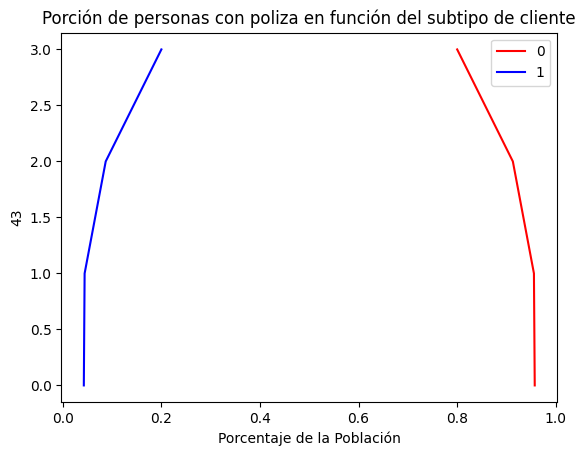

In [108]:
display_categorico(X_train[[43]], y_train, 0, 1, 'Porción de personas con poliza en función del subtipo de cliente' )

Como nos daremos cuenta, los datos están desbalanceados. Hay valores que tienen muchisimos más ejemplos que otros. Esto será una constante en todos los atributos que analicemos, y no es realmente un problema con el que podamos lidiar. Aun así, esto no es problema a no ser que haya un desbalanceo extremo donde, por ejemplo, el 90% de los datos sean del mismo tipo. Aún con esas, no podríamos hacer mucho más que tenerlo en cuenta a la hora del análisis de resultados.

No se aprecia una tendencia o relacion comentable entre los valores del atributo. Sin ninguna duda, se recomienda, a la hora del preprocesado, usar un one-hot encoding clásico. Esto hará crecer el número de columnas presentes en el DataSet, pero se usará alguna alternativa a PCA (no es bueno usarlo con DataSets mixtos) para la extracción de columnas importantes.

Se podría pensar en dejar L1, L3 y L4 como están, al considerar un orden dentro de las categorías que representan. No obstante, esto será discutido en el apartado de transformación de los datos. También se ha descartado el hecho de observar variables numéricas para alguna transformación. Podría resultar interesante en los propios casos, pero se ha optado por transformar los atributos necesarios y dejar al algoritmo de clasificación trabajar.

Finalmente, tampoco se comenta nada acerca de variables binarias, pero es que, sencillamanete, no hay. Tras leer la información del DataSet, se puede determinar y cualquier coincidencia (alguna columna donde solo aparezcan 0's y 1's), es fruto de los datos que se nos han proporcionado.

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos. 

Para esta práctica, tenemos la opción de elegir entre cuatro modelos lineales que hemos aprendido: Regresión Lineal, Regresión Logística, PLA y PLA+Pocket. Sin embargo, dado que estamos frente a un problema de clasificación, es recomendable descartar la Regresión Lineal, ya que existen técnicas específicamente diseñadas para la clasificación.

Además, podemos descartar el algoritmo PLA, ya que solo funciona bien con datos linealmente separables y, en general, el PLA+Pocket es considerado superior, ya que busca mantener la mejor solución obtenida hasta el momento.

En resumen, los dos modelos lineales que utilizaremos para abordar este problema de clasificación serán PLA+Pocket y Regresión Logística. Ambos algoritmos son eficaces en este tipo de problemas y han demostrado brindar resultados satisfactorios en prácticas anteriores.

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos. 

En el proceso de preparación del conjunto de entrenamiento, se realizará una validación cruzada de 5-fold. Esto implica dividir el conjunto de ejemplos en 5 grupos de manera estratificada, asegurando que cada grupo contenga una proporción equitativa de todas las clases presentes. Luego se llevarán a cabo 5 iteraciones, en cada una de las cuales se utilizarán 4 grupos como conjunto de entrenamiento y el grupo restante como conjunto de validación.

La validación cruzada se emplea para evaluar el rendimiento de los algoritmos de clasificación de forma más confiable. Aunque un algoritmo puede tener suerte y mostrar un buen desempeño en una única división de los datos de entrenamiento y validación, esto no garantiza su capacidad real para generalizar a nuevos conjuntos de datos. Al realizar múltiples divisiones y entrenar el algoritmo en diferentes configuraciones de datos, se obtienen medidas de error en cada iteración.

La elección de 5 validaciones se basa en la necesidad de reducir el impacto del azar en los resultados de validación. A veces, los resultados pueden verse afectados por variaciones aleatorias en la selección de los datos de entrenamiento y validación. Al realizar 5 validaciones con diferentes particiones, se obtiene una medida más robusta del rendimiento promedio del algoritmo. La media de los resultados de validación proporciona una estimación más confiable de la capacidad del algoritmo para clasificar los datos.

Un inconveniente de este enfoque es que reduce el tamaño del conjunto de entrenamiento utilizado para la validación. Sin embargo, dado que se dispone de un conjunto de datos razonablamente grande, este inconveniente se puede mitigar, ya que aún se cuenta con una cantidad suficiente de ejemplos para entrenar y evaluar el rendimiento de los algoritmos de clasificación.

In [109]:
#5-fold cross validation
particiones = np.empty((5),list)

train_data = X_train.to_numpy()
train_labels = y_train.to_numpy()

index_train = np.arange(len(train_labels))

index_yes = np.array([indice for indice in index_train if train_labels[indice] == 1])
index_no = np.array([indice for indice in index_train if train_labels[indice] == 0])


for i in range(5):
  particiones[i] = []

#En vez de tener varios conjuntos de datos, usaremos conjuntos de índices
for i in range(index_yes.shape[0]):
  particiones[i%5].append(index_yes[i])
for i in range(index_no.shape[0]):
  particiones[i%5].append(index_no[i])
  
for i in range(5):
  particiones[i] = np.asarray(particiones[i])
  np.random.shuffle(particiones[i])

training1 = np.concatenate((particiones[0],particiones[1],particiones[2],particiones[3]))
test1 = particiones[4]

training2 = np.concatenate((particiones[4],particiones[0],particiones[1],particiones[2]))
test2 = particiones[3]

training3 = np.concatenate((particiones[3],particiones[4],particiones[0],particiones[1]))
test3 = particiones[2]

training4 = np.concatenate((particiones[2],particiones[3],particiones[4],particiones[0]))
test4 = particiones[1]

training5 = np.concatenate((particiones[1],particiones[2],particiones[3],particiones[4]))
test5 = particiones[0]

cv_trains = [training1,training2,training3,training4,training5]
cv_tests = [test1,test2,test3,test4,test5]


#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas. 

Aunque sería más adecuado realizar el preprocesado antes de dividir el conjunto de entrenamiento con la validación cruzada (para evitar tener que repetirlo varias veces), he optado por hacerlo a continuación para seguir el formato establecido en la práctica. Además, al elegir particionar por índices en lugar de crear conjuntos de ejemplos separados para cada partición, puedo modificar directamente el conjunto de entrenamiento sin afectar las particiones correspondientes.

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

La siguiente función hace one_hot_encoding de la columna que se le pase como parámetro y según las categorías que se pasen como parámetro. Se hace esto porque la versión de sklearn para OneHot, crea columnas extras para las categorías que están en la columna, y obvia las que no están. Como se pensó, que si alguna categoría no aparece en train, pero si en test, se estaría omitiendo información al eliminarla, se ha optado por crear columnas de 0's si esto ocurre. No obstante, se podría probar a hacer ambas cosas y ver cuales da mejores resulados, pero por razones de tiempo, me veo obligado a continuar con esta idea.

In [111]:
from pandas.core.indexes.category import contains
def aplicar_one_hot_encoding(data, columna, categorias):
    # Realiza el one-hot encoding en la columna especificada usando las categorías proporcionadas
    columna_encoded = pd.get_dummies(data[columna], prefix=columna, columns=categorias)
    # Encuentra las categorías faltantes en la lista de categorías
    aniade = columna + '_'
    for i,st in enumerate(categorias):
      categorias[i] = aniade + str(st)

    categorias_faltantes = set(categorias) - set(columna_encoded.columns)

    # Crea columnas adicionales para las categorías faltantes y se rellenan con 0
    for categoria_faltante in categorias_faltantes:
        columna_nueva = columna + '_' + str(categoria_faltante)
        columna_encoded[columna_nueva] = 0

    # Concatena la columna codificada al conjunto de datos original
    data_encoded = pd.concat([data, columna_encoded], axis=1)

    #Elimina la columna original
    data_encoded = data_encoded.drop(columna, axis=1)

    return data_encoded

Por comodidad, se cambian todos los índices a string, vendrá mejor para tratamientos posteriores que se harán.

In [112]:
X_train.columns = X_train.columns.astype(str)


Tras realizar one-hot encoding, se pasará a normalizar las columnas numéricas (1,2 y de la 64 a la 84). Hay que tener en cuenta que cuentan con diferentes rangos. Para normalizar, se optará por un min max scaler para dejar las columnas entre 0 y 1. Aquí tampoco se ha optado por la función predefinida en sklearn, puesto que normaliza en base al minimo y al máximo presente en la columna.

Dado que si se echa un vistazo al diccionario del DataSet, tenemos rangos de valores posibles para las columnas numéricas, la normalización se hará en base al máximo y al mínimo de ese rango.

In [113]:
from sklearn.preprocessing import MinMaxScaler
def aplicar_min_max_scaler(data, columnas, max, min):
    for i in columnas:
      data[i] = (data[i]-min)/(max - min)
      data[i] = data[i] * (1-0)+0

    # scaler = MinMaxScaler(feature_range=(0, 1))
    # data[columnas] = scaler.fit_transform(data[columnas])
    return data

columnas3 = [str(i) for i in range(64,85,1)]
columnas1 = ['1']
columnas2 = ['2']

#Se normaliza tomando como máximo y mínimo los que se nos dan en la información del dataset
X_train = aplicar_min_max_scaler(X_train, columnas1, 6, 1)
X_train = aplicar_min_max_scaler(X_train, columnas2, 10, 1)
X_train = aplicar_min_max_scaler(X_train, columnas3, 12, 1)
X_train

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
559,26,0.4,0.111111,4,6,0,3,0,6,5,...,-0.090909,-0.090909,-0.090909,-0.090909,0.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
771,37,0.0,0.222222,3,8,9,0,0,0,6,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
4701,9,0.0,0.333333,2,3,2,3,1,5,7,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
3315,33,0.0,0.222222,3,8,0,4,1,5,6,...,-0.090909,-0.090909,-0.090909,-0.090909,0.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
5133,10,0.0,0.222222,2,3,0,6,2,1,7,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,12,0.0,0.222222,2,3,0,6,0,3,7,...,-0.090909,-0.090909,-0.090909,0.000000,0.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
578,33,0.0,0.111111,3,8,0,7,2,0,9,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
26,12,0.0,0.333333,2,3,0,7,2,0,9,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
2439,38,0.0,0.222222,3,9,1,6,2,2,7,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909


Las columnas numéricas que acaban de ser normalizadas se extraen a un dataset complementario para poder aplicarle la técnica PCA.

In [114]:
numericos = X_train.iloc[:, [1, 2] + [i for i in range(64,85,1)]]


Se aplica PCA a los numéricos. 



PCA (Principal Component Analysis) es un algoritmo estadístico ampliamente utilizado para reducir la dimensionalidad de un conjunto de datos mientras se conserva la mayor cantidad posible de información. Su objetivo es encontrar nuevas variables, llamadas componentes principales, que sean combinaciones lineales de las variables originales.

En la implementación de PCA en la biblioteca scikit-learn (sklearn), se considera como un algoritmo de aprendizaje, pero en realidad no realiza un aprendizaje en el sentido tradicional. En su lugar, se utiliza el conjunto de datos de entrenamiento para calcular los componentes principales, y luego se puede aplicar la misma transformación a otros conjuntos de datos, como los conjuntos de datos de prueba.

Al aplicar PCA, obtenemos un nuevo conjunto de datos que tiene menos dimensiones que el conjunto de datos original. Esto se logra al eliminar las dimensiones que tienen menos variabilidad o contribuyen menos a la estructura global de los datos. Sin embargo, es importante destacar que PCA no garantiza que no se pierda información en el proceso de reducción de dimensionalidad, pero intenta minimizar dicha pérdida.

Si deseamos especificar cuántas dimensiones queremos en el conjunto de datos transformado, podemos indicar el número deseado al aplicar PCA. De lo contrario, PCA calculará automáticamente el número de dimensiones necesarias para mantener la mayor cantidad de información posible.

Además, PCA también permite realizar una transformación inversa, lo que significa que podemos recuperar los datos originales (o al menos una aproximación cercana) a partir del conjunto de datos transformado. Esto es útil si queremos interpretar o visualizar los datos en su forma original después de reducir la dimensionalidad.

En resumen, PCA es un algoritmo que reduce la dimensionalidad de un conjunto de datos al encontrar combinaciones lineales de las variables originales. Aunque intenta minimizar la pérdida de información, es importante tener en cuenta que existe una pérdida inherente al reducir las dimensiones. Sin embargo, PCA proporciona una herramienta útil para explorar y analizar conjuntos de datos complejos.



Al entrenar el modelo PCA, aseguramos que se conserve la mayor cantidad posible de información del conjunto de datos original. Luego, podemos examinar los componentes resultantes y clasificarlos según su contribución al total de la información contenida en los datos. Esta contribución se representa mediante el concepto de "porcentaje de varianza explicada acumulada".

El porcentaje de varianza explicada acumulada es una medida que indica el porcentaje de información que se conserva si utilizamos los 'n' componentes más importantes en lugar de todas las variables originales. En otras palabras, representa qué proporción de la variabilidad de los datos se captura al considerar solo los 'n' componentes más significativos.

Al observar la curva de porcentaje de varianza explicada acumulada, podemos evaluar cómo se reduce la pérdida de información a medida que aumentamos el número de componentes considerados. Si seleccionamos un número suficiente de componentes con alta varianza explicada, podemos mantener una gran cantidad de información mientras reducimos la dimensionalidad del conjunto de datos.


90% de la información mantenida con  6  componentes
95% de la información mantenida con  8  componentes
99% de la información mantenida con  16  componentes


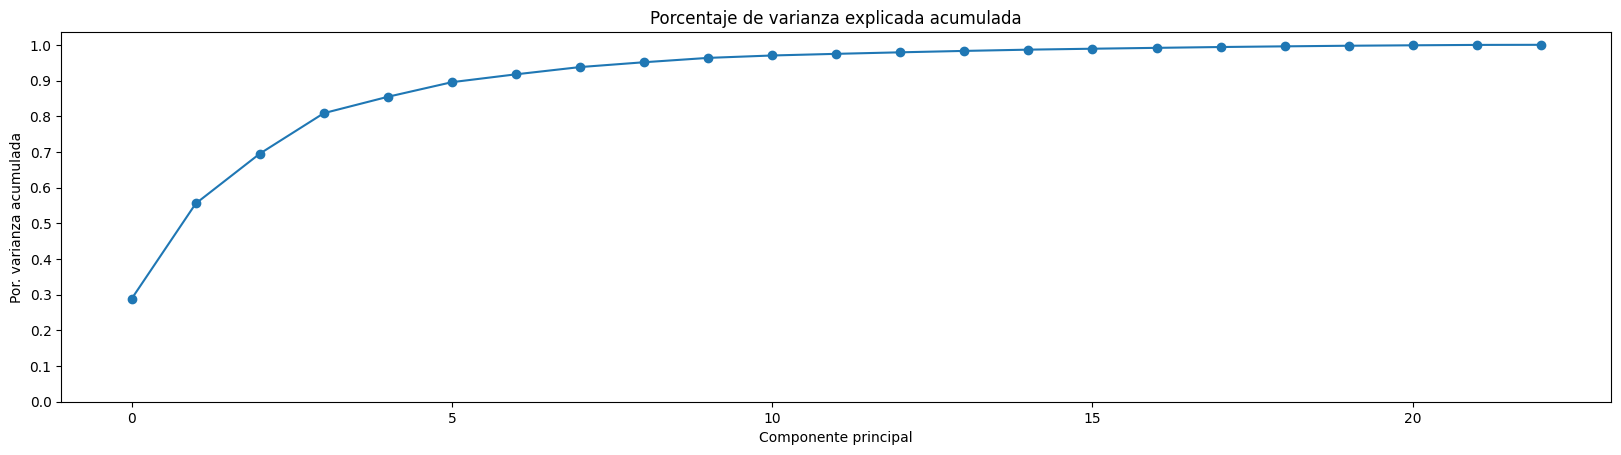

In [115]:
from sklearn.decomposition import PCA

modelo_pca = PCA().fit(numericos)
datos = numericos

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots()
ax.plot(np.arange(len(datos.columns)),prop_varianza_acum,'-o')

fig.set_figwidth(20)  
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

percentil90 = np.where(prop_varianza_acum >= 0.90)[0][0]
print('90% de la información mantenida con ', percentil90, ' componentes')
percentil95 = np.where(prop_varianza_acum >= 0.95)[0][0]
print('95% de la información mantenida con ', percentil95, ' componentes')
percentil99 = np.where(prop_varianza_acum >= 0.99)[0][0]
print('99% de la información mantenida con ', percentil99, ' componentes')

Se opta por coger la opción que mantiene un 95% de información, ya que elimina una buena parte de las columnas.

In [116]:
modelo_pca = PCA(n_components=percentil95).fit(numericos)
numericos = pd.DataFrame(modelo_pca.transform(numericos))
numericos

,0,1,2,3,4,5,6,7
0,-0.072166,0.379183,0.068896,0.029114,-0.004484,-0.017830,0.003112,-0.001593
1,0.035084,-0.022970,0.013141,0.048225,0.052215,-0.048207,0.005358,0.023151
2,0.143608,-0.021087,-0.022895,-0.039265,0.058480,-0.053434,0.005990,0.025135
3,0.033178,-0.021729,0.074926,0.010799,0.005100,-0.023178,-0.000815,-0.002052
4,0.034968,-0.022240,-0.077205,-0.020551,0.006991,-0.004363,-0.009689,0.012107
...,...,...,...,...,...,...,...,...
7852,0.031392,-0.018923,0.038463,-0.071178,0.013041,-0.024029,0.000616,0.008865
7853,-0.072164,-0.026681,-0.005693,0.147012,-0.011240,0.001725,-0.008492,-0.005409
7854,0.147889,-0.026529,-0.038883,0.058155,-0.001106,-0.005166,-0.011066,0.002304
7855,0.034968,-0.022240,-0.077205,-0.020551,0.006991,-0.004363,-0.009689,0.012107


A partir de ahora, se realizará el tratamiento de las columnas categóricas directamente en train. Posteriormente se borraran las numércias que ya han sido tratadas a parte y se añadirán las columnas del DataSet **numericos** al final de train.

A L0 y L2 se le aplica one hot, no hay orden posible.

In [117]:
L0 = [i for i in range(1,42)]
# L1 = np.arange(1,7)
L2 = [i for i in range(1,11)]
# L3 = np.arange(1,10)
# L4 = L3.copy()

# columnas_L3 = [str(i) for i in range(5,43,1)]
# columnas_L4 = [str(i) for i in range(43,64,1)]

X_train = aplicar_one_hot_encoding(X_train, '0', L0)
# X_train = aplicar_one_hot_encoding(X_train, '3', L1)
X_train = aplicar_one_hot_encoding(X_train, '4', L2)
# for col in columnas_L3:
#   X_train = aplicar_one_hot_encoding(X_train, col , L3)

# for col in columnas_L4:
#   X_train = aplicar_one_hot_encoding(X_train, col , L4)
# X_train
X_train

,1,2,3,5,6,7,8,9,10,11,...,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9,4_10
559,0.4,0.111111,4,0,3,0,6,5,0,4,...,0,0,0,0,0,1,0,0,0,0
771,0.0,0.222222,3,9,0,0,0,6,2,2,...,0,0,0,0,0,0,0,1,0,0
4701,0.0,0.333333,2,2,3,1,5,7,0,2,...,0,0,1,0,0,0,0,0,0,0
3315,0.0,0.222222,3,0,4,1,5,6,2,2,...,0,0,0,0,0,0,0,1,0,0
5133,0.0,0.222222,2,0,6,2,1,7,0,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.222222,2,0,6,0,3,7,2,0,...,0,0,1,0,0,0,0,0,0,0
578,0.0,0.111111,3,0,7,2,0,9,0,0,...,0,0,0,0,0,0,0,1,0,0
26,0.0,0.333333,2,0,7,2,0,9,0,0,...,0,0,1,0,0,0,0,0,0,0
2439,0.0,0.222222,3,1,6,2,2,7,1,2,...,0,0,0,0,0,0,0,0,1,0


L1:

    1 20-30 years
    2 30-40 years
    3 40-50 years
    4 50-60 years
    5 60-70 years
    6 70-80 years

L3:

    0 0%
    1 1 - 10%
    2 11 - 23%
    3 24 - 36%
    4 37 - 49%
    5 50 - 62%
    6 63 - 75%
    7 76 - 88%
    8 89 - 99%
    9 100%

L4:

    0 f 0
    1 f 1 – 49
    2 f 50 – 99
    3 f 100 – 199
    4 f 200 – 499
    5 f 500 – 999
    6 f 1000 – 4999
    7 f 5000 – 9999
    8 f 10.000 - 19.999
    9 f 20.000 - ?


Estas tienen más interés, dado que parece que la variable categórica esta representando información en orden, siendo el más claro L1. En las demás, si bien se indica un cierto orden, es cierto que entre un valor y otro no se mantiene la proporcion (en los casos extremos). No obstante, se va a optar por tratarlas de la misma manera que L1.

Estas columnas se dejarán tal cual dado que son categóricas ordinales y serán normalizadas según min max. Se podría hacer otra implementación de prueba apliando one hot a L3 y L4 pero por razones de tiempo se seguirá con esta idea.

A continuación se hará una transformación min max para observar si dejando así la columna y normalizando, se sigue guardando la proporción.

In [118]:
####Pruebas para L1

p1 = np.array([1.0,2.0,3.0,4.0,5.0])

for index, i in enumerate(p1):
    p1[index] = (i-1)/(6 - 1)
    p1[index] = p1[index] * (1 - 0) + 0

print(p1)

[0.  0.2 0.4 0.6 0.8]


Parece que no hay problema en normalizar ya que la proporcion se mantiene. Por tanto, se normalizan los grupos de columnas pertinentes.

In [119]:
columnasL1 = ['3']
columnasL3 = [str(i) for i in range(5,47,1)]
columnasL4 = [str(i) for i in range(43,68,1)]

X_train = aplicar_min_max_scaler(X_train, columnasL1, 6, 1)
X_train = aplicar_min_max_scaler(X_train, columnasL3, 9, 0)
X_train = aplicar_min_max_scaler(X_train, columnasL1, 9, 0)


X_train


,1,2,3,5,6,7,8,9,10,11,...,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9,4_10
559,0.4,0.111111,0.066667,0.000000,0.333333,0.000000,0.666667,0.555556,0.000000,0.444444,...,0,0,0,0,0,1,0,0,0,0
771,0.0,0.222222,0.044444,1.000000,0.000000,0.000000,0.000000,0.666667,0.222222,0.222222,...,0,0,0,0,0,0,0,1,0,0
4701,0.0,0.333333,0.022222,0.222222,0.333333,0.111111,0.555556,0.777778,0.000000,0.222222,...,0,0,1,0,0,0,0,0,0,0
3315,0.0,0.222222,0.044444,0.000000,0.444444,0.111111,0.555556,0.666667,0.222222,0.222222,...,0,0,0,0,0,0,0,1,0,0
5133,0.0,0.222222,0.022222,0.000000,0.666667,0.222222,0.111111,0.777778,0.000000,0.222222,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.222222,0.022222,0.000000,0.666667,0.000000,0.333333,0.777778,0.222222,0.000000,...,0,0,1,0,0,0,0,0,0,0
578,0.0,0.111111,0.044444,0.000000,0.777778,0.222222,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
26,0.0,0.333333,0.022222,0.000000,0.777778,0.222222,0.000000,1.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
2439,0.0,0.222222,0.044444,0.111111,0.666667,0.222222,0.222222,0.777778,0.111111,0.222222,...,0,0,0,0,0,0,0,0,1,0


A continuación, se une X_train con numericos tras eliminar las columnas numéricas originales de X_train.

In [120]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['1', '2']
columnas_a_eliminar.extend([str(i) for i in range(64,85,1)])

# Eliminar las columnas por su nombre
X_train = X_train.drop(columns=columnas_a_eliminar)
print(X_train.shape)

X_train = X_train.to_numpy()
numericos = numericos.to_numpy()
X_train = pd.DataFrame(X_train)
numericos = pd.DataFrame(numericos)

X_train = pd.concat([X_train, numericos], axis=1)
X_train = X_train.to_numpy()
X_train = pd.DataFrame(X_train)
X_train
print(X_train.shape)




(7857, 111)
(7857, 119)


Ahora sería el momento de los outliers y de recalcular los indices de validación. LocalOutlierFactor (LOF) es un algoritmo de detección de anomalías utilizado en aprendizaje automático. Su objetivo principal es identificar puntos de datos atípicos o "anómalos" en un conjunto de datos. LOF se basa en la suposición de que los puntos anómalos tienen una densidad de vecinos significativamente menor en comparación con los puntos normales en su vecindario local.

In [121]:
# ###OUTLIERS
from sklearn.neighbors import LocalOutlierFactor
# # identify outliers in the training dataset
datos_antes = X_train.shape[0]

X_train_p = X_train.to_numpy()
y_train_p = y_train.to_numpy()
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(X_train_p)
mask = yhat != -1
X_train_p, y_train_p = X_train_p[mask, :], y_train_p[mask]

X_train_p = pd.DataFrame(X_train_p)
y_train_p = pd.DataFrame(y_train_p)

datos_despues = X_train_p.shape[0]
print(X_train.shape)
print("Datos eliminados por LOF: ", (datos_antes-datos_despues)/datos_antes*100, "%")
# ##Se repite CV-5
#5-fold cross validation
# particiones = np.empty((5),list)

# train_data = X_train.to_numpy()
# train_labels = y_train.to_numpy()

# index_train = np.arange(len(train_labels))

# for i in range(5):
#   particiones[i] = []

# #En vez de tener varios conjuntos de datos, usaremos conjuntos de índices, que son mucho más cómodos de manejar
# for i in range(index_train.shape[0]):
#   particiones[i%5].append(index_train[i])
  
# for i in range(5):
#   particiones[i] = np.asarray(particiones[i])
#   np.random.shuffle(particiones[i])

# training1 = np.concatenate((particiones[0],particiones[1],particiones[2],particiones[3]))
# test1 = particiones[4]

# training2 = np.concatenate((particiones[4],particiones[0],particiones[1],particiones[2]))
# test2 = particiones[3]

# training3 = np.concatenate((particiones[3],particiones[4],particiones[0],particiones[1]))
# test3 = particiones[2]

# training4 = np.concatenate((particiones[2],particiones[3],particiones[4],particiones[0]))
# test4 = particiones[1]

# training5 = np.concatenate((particiones[1],particiones[2],particiones[3],particiones[4]))
# test5 = particiones[0]

# cv_trains = [training1,training2,training3,training4,training5]
# cv_tests = [test1,test2,test3,test4,test5]

(7857, 119)
Datos eliminados por LOF:  10.003818251240931 %


Como se puede observar, la técnica LOF elimina demasiados datos del dataset (en torno al 10%), lo cual es drástico partiendo de que el DataSet no tiene una exageración de entradas. Dada la diemensionalidad de este, sería crítico observar una a una las diferentes entradas para detectar algún dato anómalo u erróneo, así que se dejará como está.

Este apartado final es a modo de explicación. Al principio, en vez de hacer PCA a las numéricas y unir después con las categóricas transformadas, se pensaba hacer FAMD, una técnica parecida a PCA (en cuanto a lo que pretende conseguir), pero pensada para DataSets mixtos (con información numérica y categórica). No obstante, dadas las pocas referencias teóricas que se tenían sobre este método y a la dificultad para entender los parámetros de la biblioteca prince, se optó por lo que se ha hecho, aunque sería una buena idea rehacerlo todo aplicando esta técnica y ver que tal los resultados.

In [122]:
# # !pip install pprint
# import prince
# import pprint


# # (1,2 y de la 64 a la 84).
# for col in X_train.columns:
#   if(col == 1 or col == 2 or col in np.arange(64,85)):
#     pass
#   else:
#     X_train[col] = X_train[col].astype("category")

# # X_train2 = X_train.select_dtypes(np.number).columns
# # X_train2
# # Crea un diccionario para mapear los títulos de columna actuales
# # a cadenas de texto (str)
# nuevos_titulos = {col: str(col) for col in X_train.columns}
# print(nuevos_titulos)
# # Utiliza la función "rename()" para cambiar los títulos de columna
# X_train = X_train.rename(columns=nuevos_titulos)
# # Instantiate FAMD object
# famd = prince.FAMD(
#      n_components=25,
#      n_iter=10,
#      copy=True,
#      check_input=True,
#      engine='sklearn',       ## Can be "auto", 'sklearn', 'fbpca'
#      random_state=33)

# ## Fit FAMD object to data 
# famd = famd.fit(X_train) 

# ## Inspect principal dimensions
# pp = pprint.PrettyPrinter()
# pp.pprint(famd) 
# X_train

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos. 

Dado que estamos abordando un problema de clasificación binaria y nuestro objetivo es maximizar la proporción de datos clasificados correctamente, utilizaremos la métrica de precisión (Accuracy) como medida de evaluación. Accuracy se define como la proporción de predicciones correctas sobre el total de predicciones realizadas.

En lugar de implementar nuestra propia métrica de precisión, podemos aprovechar la comodidad que nos brinda la biblioteca scikit-learn (sklearn) en Python. Sklearn proporciona una implementación precisa y fácil de usar de varias métricas de evaluación, incluida la métrica Accuracy.

## Matriz de confusión

Es cierto que en problemas de clasificación desbalanceados, donde una clase tiene una representación mucho mayor que la otra, el uso exclusivo de la métrica Accuracy puede ser engañoso. Como se mencionó, un clasificador que siempre predice la clase mayoritaria podría tener una alta precisión simplemente por "adivinar" la clase mayoritaria en la mayoría de los casos.

Para abordar esta situación, una buena práctica es utilizar la matriz de confusión (confusion matrix) al evaluar nuestro clasificador. La matriz de confusión es una herramienta que resume las clasificaciones realizadas por un modelo, mostrando la cantidad de ejemplos que fueron clasificados correctamente y los que fueron clasificados incorrectamente para cada clase.

La matriz de confusión nos permite identificar rápidamente los resultados anómalos o indeseables en términos de clasificaciones incorrectas. A partir de esta matriz, podemos extraer diversas métricas que nos brindan información más detallada sobre el rendimiento del clasificador.

En este caso, al enfrentarnos a un desbalanceo de clases, nos interesará evaluar dos medidas específicas: Sensitivity (sensibilidad) y Specificity (especificidad). Estas medidas nos ayudarán a comprender cómo nuestro modelo está clasificando correctamente los positivos ('1') y los negativos ('0') respectivamente.

+ La Sensitivity se refiere al porcentaje de ejemplos positivos ('1') que han sido correctamente clasificados por nuestro modelo. Es decir, representa la capacidad del modelo para identificar correctamente los verdaderos positivos. 

+ La Specificity representa el porcentaje de ejemplos negativos ('0') que han sido correctamente clasificados, lo que refleja la capacidad del modelo para identificar los verdaderos negativos.

La matriz de confusión, que podemos obtener fácilmente utilizando la función proporcionada por sklearn, es una herramienta valiosa para calcular estas medidas. La matriz de confusión resume las clasificaciones realizadas por el modelo en cuatro categorías: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

Todo esto tiene como fin, usar el balanced accuracy para comparar modelos. Justamente la fórmula para calcularlo es la siguiente:

$Balanced\ Accuracy = \frac{Sensitivity + Specificity}{2}$

Es una métrica que nos viene muy bien para nuestro DataSet desbalanceado, ya que otorga la misma importancia a acertar positivos o negativos.

Además de todo esto, en los distintos algoritmos se explorará el parámetro class_weight. muy útil también para clases desbalanceadas.

## Función de pérdida

En cuanto a la función de pérdida, Regresión Logística hace uso de la Entropía Cruzada y Perceptron realmente no tiene una función de pérdida como tal si no que en cada iteración intenta clasificar bien un punto mal clasificado en base a su distancia a la recta actual.

In [123]:
from sklearn import metrics
def puntuar(sensitivity, specificity):
  return (sensitivity+specificity)/2

## <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto. 

Usaré dos modelos de aprendizaje: PLA+Pocket y Regresión Logística. Para PLA+Pocket, a pesar de que sklearn no tiene una implementación directa de Pocket, podemos lograr algo similar utilizando PLA con Early Stopping. Para Regresión Logística, utilizaré tanto la implementación directa de sklearn 'LogisticRegression', como 'SGDClassifier' con el parámetro loss='log_loss' para poder usar el algoritmo SGD. Compararé ambos modelos y seleccionaré el que me dé mejores resultados.

Para seleccionar los hiperparámetros, los elegiré mediante teoría o mediante Gridsearch. Sin embargo, realizar Gridsearch con todos los posibles hiperparámetros es computacionalmente inviable debido al crecimiento exponencial del número de modelos que se deben entrenar. Por lo tanto, consideraré otras opciones, como elegir algunos parámetros antes del Gridsearch basándome en una pequeña batería experimental, o seleccionar parámetros después del Gridsearch para maximizar los resultados o cuando haya demasiadas opciones para probar.

Es importante tener en cuenta que los resultados pueden variar ligeramente entre ejecuciones debido a la aleatoriedad y a la proximidad de los resultados entre sí. A continuación, enumeraré los hiperparámetros relevantes, los valores seleccionados y las justificaciones para cada modelo de aprendizaje.

REGRESIÓN LOGÍSTICA

Antes de realizar cualquier ejecución, hay ciertos hiperparámetros que prefijaré. 

+ En primer lugar, elijo el algoritmo de optimización 'solver' para los modelos de Regresión Logística. Basándome en la documentación oficial de sklearn (https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression), elijo 'Saga' o 'Sas' debido al tamaño grande de nuestro conjunto de datos. Saga es preferido, ya que es similar a Sas pero soporta todos los tipos de regularización. 

*The “sag” solver uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.*

*The “saga” solver is a variant of “sag” that also supports the non-smooth penalty="l1". This is therefore the solver of choice for sparse multinomial logistic regression. It is also the only solver that supports penalty="elasticnet".*

+ El parámetro 'warm_start' no tendrá un impacto significativo en nuestro caso, ya que solo entrenamos el modelo una vez, por lo que lo dejaremos en su valor predeterminado (False).

+ Dado que tenemos una clasificación binaria, la estrategia de clasificación 'multi_class' será seleccionada automáticamente como 'ovr' (One-vs-Rest) por defecto, lo cual es apropiado en este escenario.

+ En cuanto al parámetro 'n_jobs', estableceré su valor en -1 para aprovechar todos los núcleos de la CPU disponibles, aunque en una clasificación binaria no proporcionará una mejora significativa en el rendimiento.

+ El parámetro 'dual' se mantendrá en su valor predeterminado (False) porque no se recomienda utilizar la formulación dual cuando el número de muestras es mayor que el número de atributos, como es nuestro caso.

+ Los hiperparámetros 'random_state', 'intercept_scaling' y 'verbose' se dejarán en sus valores predeterminados debido a que no son relevantes en nuestro contexto.

+ El hiperparámetro 'l1_ratio' no será utilizado, ya que no estamos interesados en utilizar la regularización 'Elastic-Net', y su valor se establecerá en su valor predeterminado (None).

+ Por último, mantendremos el valor predeterminado de 'fit_intercept' en True, ya que agregar una constante a la función de decisión suele ser una buena práctica.

Para algunos hiperparámetros, realizaré una exploración experimental antes de utilizar Gridsearch. 

+ Estos incluyen 'tol' (tolerancia del criterio de parada) y 'max_iter' (número máximo de iteraciones permitidas para converger).

Luego, utilizaré Gridsearch para explorar diferentes valores de los hiperparámetros:
+ 'penalty' (tipo de regularización) 
+ 'C' (inversa del factor de regularización). 

Para el tipo de regularización, solo consideraré 'l1' y 'l2', ya que 'elasticnet' es más complejo y escapa al alcance de esta práctica.

Después de Gridsearch, exploraré el hiperparámetro 'class_weight' para abordar el desequilibrio de clases en nuestro conjunto de datos. Al asignar diferentes pesos a las clases, intentaré maximizar la precisión para ambas clases, especialmente para la clase '1' que está desbalanceada.

In [124]:
from sklearn.linear_model import LogisticRegression

SGD CLASIFFIER

Antes de ejecutar el algoritmo SGD, se establecen ciertos parámetros que afectan su funcionamiento:

+ Función de pérdida (loss): Es la función utilizada para medir la discrepancia entre las predicciones y los valores reales. En este caso, se utiliza la función logarítmica para clasificación logística.

+ Warm_start: Es una técnica que consiste en reutilizar la solución anterior como punto de partida para el entrenamiento actual. En este caso, como solo se entrena el modelo una vez, no es relevante.

+ n_jobs: Indica el número de núcleos de CPU utilizados para ejecutar en paralelo. Un valor de -1 significa utilizar todos los núcleos disponibles, aunque en problemas de clasificación binaria puede tener un impacto limitado en el rendimiento.

+ shuffle: Determina si se deben reordenar los datos después de cada iteración. En general, es recomendable reordenarlos, y por defecto se establece en True.

+ random_state: Se utiliza cuando shuffle es True para establecer la semilla aleatoria para el reordenamiento de los datos. En este caso, se utiliza el valor predeterminado (None) para generar aleatoriamente la semilla.

+ verbose: Controla la cantidad de información que se muestra durante la ejecución. El valor predeterminado de 0 indica que se muestra la mínima información necesaria.

+ epsilon: Se utiliza en funciones de pérdida epsilon-insensibles, pero no es relevante para este caso.

+ l1_ratio: Se aplica cuando se utiliza la regularización "Elastic-Net" y determina cómo se mezclan las penalizaciones L1 y L2. No se utiliza en este caso, por lo que se mantiene el valor predeterminado.

+ fit_intercept: Indica si se debe agregar una constante a la función de decisión. Es una práctica común y se establece en True por defecto.

+ early_stopping: Se utiliza para detener el entrenamiento antes de tiempo si no se observa una mejora en la solución basada en un conjunto de validación. No se utiliza en este caso.

+ validation_fraction: Determina el porcentaje de datos que se utilizará para la validación cuando se utiliza early_stopping. No es relevante en este caso.

+ average: Indica si se debe calcular y almacenar el promedio de los pesos de todas las actualizaciones. No se utiliza en este estudio.

Además, se establecerán experimentalmente los siguientes hiperparámetros antes de Gridsearch:

+ tol: Es la tolerancia que determina cuándo se considera que la solución no ha empeorado lo suficiente.

+ n_iter_no_change: Es el número de iteraciones consecutivas en las que la solución no mejora antes de detener el entrenamiento.

+ max_iter: Es el número máximo de épocas (iteraciones) permitidas.

Después de establecer los parámetros mencionados anteriormente, se realizará una búsqueda en la cuadrícula (Gridsearch) para encontrar los mejores hiperparámetros. Los hiperparámetros que se explorarán son los siguientes:

+ Penalty: Es el tipo de regularización que se aplicará. Se considerarán dos opciones: 'l1' y 'l2'. No se utilizará 'elasticnet' en este estudio.

+ alpha: Es el factor de regularización que controla la intensidad de la regularización. Se probarán tres valores: 1 (valor predeterminado), 1000 (regularización alta) y 0.001 (regularización baja). Estos valores permitirán evaluar el impacto de diferentes niveles de regularización en el modelo.

+ Learning Rate: Se explorará utilizando dos enfoques diferentes:

    a) Constante (constant): Se utilizará un valor constante de Learning Rate para el entrenamiento. Se probarán diferentes valores de eta0 (0.0001, 1 y 1000) para evaluar su impacto en el rendimiento del modelo. Si se observa una mejora significativa con algún valor, se puede realizar una exploración más detallada dentro de ese rango.

    b) Óptimo (optimal): Se utilizará el Learning Rate óptimo, que es adaptativo y varía durante el entrenamiento para lograr una convergencia más rápida. Se explorarán diferentes combinaciones de tipos y valores de Learning Rate para buscar el mejor resultado posible.

+ eta0: Se aplica solo cuando se utiliza el enfoque de Learning Rate constante. Representa el valor constante del Learning Rate. Se probarán valores de eta0 de 0.0001, 1 y 1000 para evaluar su impacto en el rendimiento.

Después de Gridsearch, se realizarán experimentos con los siguientes hiperparámetros:

+ class_weight - Pesos asociados a las clases de nuestro modelo. Como en nuestro caso tenemos muchísimo desbalance, es muy probable que el algoritmo prácticamente desprecie la clase 'yes', por lo que intentaré darle diferentes pesos a las clases, en busca de maximizar el acierto sobre esa clase también.

+ Learning Rate, así como sus parámetros asociados (eta0 y power_t)

In [125]:
from sklearn.linear_model import SGDClassifier

PERCEPTRON POCKET

Es cierto que el algoritmo Perceptron (PLA) está diseñado para iterar hasta que pueda separar perfectamente el conjunto de datos. Sin embargo, cuando el conjunto de datos no es linealmente separable, el PLA puede continuar iterando indefinidamente sin lograr una separación adecuada.

Una solución sencilla para este problema sería limitar el número de iteraciones. Sin embargo, esto plantea dos problemas importantes. En primer lugar, no garantiza detenerse después de converger, lo que significa que podría terminar antes de encontrar una solución óptima. En segundo lugar, no garantiza devolver la mejor solución encontrada, ya que podría detenerse antes de alcanzar una solución óptima.

Para abordar estos problemas, se puede utilizar una técnica llamada Early Stopping (detención temprana). En lugar de detenerse después de un número fijo de iteraciones, el algoritmo se detiene cuando no logra mejorar los resultados. Esto se logra reservando una fracción de los datos para validación y monitoreando el rendimiento del modelo en estos datos de validación.

Al utilizar Early Stopping, podemos simular algo similar al Pocket-PLA. En lugar de detenerse después de un número fijo de ejecuciones, el algoritmo se detendrá cuando se determine que no puede mejorar los resultados utilizando los datos de validación. Esto nos permite obtener una solución que no solo convergio, sino que también es la mejor posible en términos de los datos de validación.

Vamos a repasar los parámetros que vamos a establecer antes de ejecutar cualquier proceso:

+ Warm_start: Esta técnica consiste en reutilizar la solución del entrenamiento anterior como inicialización para el siguiente entrenamiento. En nuestro caso, como solo entrenamos una vez por modelo, su valor predeterminado (False) es indiferente.

+ n_jobs: Determina el número de núcleos de la CPU que se utilizarán para paralelizar la ejecución. Establecerlo en -1 permite utilizar todos los núcleos disponibles. Aunque en un problema de clasificación binaria no mejora significativamente el rendimiento, no tiene efectos negativos.

+ shuffle: Indica si los datos deben ser reordenados después de cada época. Es una buena práctica realizar esta reordenación, por lo que se mantiene el valor predeterminado (True).

+ random_state: Si shuffle es True, este parámetro determina la semilla utilizada para la reordenación. Se puede especificar un entero, una instancia de 'randomState' o dejarlo en None para generar una semilla aleatoria. En nuestro caso, la semilla no es relevante, por lo que se mantiene el valor predeterminado (None).

+ verbose: Controla la cantidad de información del registro que se muestra por pantalla. Al ser una variable informativa, se mantiene en su valor predeterminado (0).

+ l1_ratio: Este parámetro se utiliza en la regularización 'Elastic-Net' para mezclar las penalizaciones L1 y L2. No vamos a utilizar esta regularización en nuestra práctica, por lo que se mantiene en su valor predeterminado (0.15).

+ fit_intercept: Indica si se permite añadir una constante a la función de decisión. En la mayoría de los casos, es una buena práctica incluir esta constante, ya que proporciona más flexibilidad al algoritmo. Por lo tanto, se mantiene en su valor predeterminado (True).

+ early_stopping: Si se activa, se reservará una fracción de los datos para validación y el algoritmo se detendrá cuando no se observe mejora en los resultados de validación. En el caso del Perceptron, esto nos permite simular una versión similar al Pocket-PLA. Por lo tanto, se establece en True.

+ validation_fraction: Determina el porcentaje de datos que se utilizarán para validación si se utiliza early_stopping. Como no vamos a utilizarlo, su valor predeterminado no es relevante.

A continuación, detallamos los parámetros que vamos a ajustar experimentalmente antes de realizar la búsqueda en cuadrícula (Gridsearch):

+ tol: Tolerancia que indica cuándo se considera que la solución no ha mejorado.

+ n_iter_no_change: Número de iteraciones consecutivas en las que la solución no mejora antes de detener el entrenamiento.

+ max_iter: Número máximo de épocas permitidas.

Estos tres parámetros son fundamentales para el criterio de parada. Buscaremos valores que sean consistentes en todos los modelos y permitan la convergencia.

Ahora, pasamos a los parámetros que ajustaremos experimentalmente mediante Gridsearch:

+ Penalty: Este parámetro determina el tipo de regularización. Existen varios tipos, pero en nuestra práctica nos limitaremos a 'l1' y 'l2'. Explorar diferentes valores de 'l1_ratio', incluyendo 0 para 'l2' y 1 para 'l1', sería una opción interesante, pero se escapa del alcance de nuestros conocimientos teóricos actuales.

+ alpha: Es el factor de regularización, que determina la fuerza de la regularización. Valores más altos indican una regularización más fuerte. Vamos a probar tres valores: 1 (valor predeterminado), 1000 (regularización muy alta) y 0.001 (regularización muy baja). Si observamos diferencias significativas con alguno de estos valores, podremos explorar valores intermedios después de la búsqueda en cuadrícula.

+ eta0: Learning Rate (tasa de aprendizaje) en el Perceptron. En nuestro caso, solo puede ser constante. Vamos a probar tres valores: 0.0001, 1 y 1000. Si encontramos una mejora sustancial con alguno de ellos, podemos investigar más a fondo ese rango de valores.

Por último, mencionamos los parámetros que ajustaremos experimentalmente después de la búsqueda en cuadrícula:

+ class_weight: Estos pesos se asocian a las clases del modelo. Dado que tenemos un gran desequilibrio de clases, es probable que el algoritmo ignore prácticamente la clase 'yes'. Intentaremos asignar diferentes pesos a las clases para maximizar la precisión en ambas.

In [126]:
from sklearn.linear_model import Perceptron

In [127]:
aux_train_data = X_train[:int(X_train.shape[0]*0.1)]
aux_train_labels = y_train[:int(X_train.shape[0]*0.1)]
aux_test_data = X_train[-int(X_train.shape[0]*0.1):-1]
aux_test_labels = y_train[-int(X_train.shape[0]*0.1):-1]

## LOGISTIC REGRESSION

### MAX ITER

In [128]:
w = LogisticRegression(max_iter=10000, solver='saga', n_jobs=-1).fit(aux_train_data,aux_train_labels)
print(w.n_iter_)


[741]


In [129]:
max_iter1 = 100
# Obtener el máximo y mínimo de cada columna
for columna in X_train.columns:
    valor_maximo = X_train[columna].max()
    valor_minimo = X_train[columna].min()
    print(f'Máximo de {columna}: {valor_maximo}')
    print(f'Mínimo de {columna}: {valor_minimo}')

Máximo de 0: 0.1111111111111111
Mínimo de 0: 0.0
Máximo de 1: 1.0
Mínimo de 1: 0.0
Máximo de 2: 1.0
Mínimo de 2: 0.0
Máximo de 3: 0.5555555555555556
Mínimo de 3: 0.0
Máximo de 4: 1.0
Mínimo de 4: 0.0
Máximo de 5: 1.0
Mínimo de 5: 0.0
Máximo de 6: 0.7777777777777778
Mínimo de 6: 0.0
Máximo de 7: 1.0
Mínimo de 7: 0.0
Máximo de 8: 1.0
Mínimo de 8: 0.0
Máximo de 9: 1.0
Mínimo de 9: 0.0
Máximo de 10: 1.0
Mínimo de 10: 0.0
Máximo de 11: 1.0
Mínimo de 11: 0.0
Máximo de 12: 1.0
Mínimo de 12: 0.0
Máximo de 13: 1.0
Mínimo de 13: 0.0
Máximo de 14: 1.0
Mínimo de 14: 0.0
Máximo de 15: 0.5555555555555556
Mínimo de 15: 0.0
Máximo de 16: 1.0
Mínimo de 16: 0.0
Máximo de 17: 1.0
Mínimo de 17: 0.0
Máximo de 18: 1.0
Mínimo de 18: 0.0
Máximo de 19: 1.0
Mínimo de 19: 0.0
Máximo de 20: 1.0
Mínimo de 20: 0.0
Máximo de 21: 1.0
Mínimo de 21: 0.0
Máximo de 22: 1.0
Mínimo de 22: 0.0
Máximo de 23: 1.0
Mínimo de 23: 0.0
Máximo de 24: 1.0
Mínimo de 24: 0.0
Máximo de 25: 1.0
Mínimo de 25: 0.0
Máximo de 26: 1.0
Mínimo

Esta impresión se realizó por que parece extraño que el modelo converja tan lento. Al leer la documentación oficial de sklearn, se llegó a la conclusión de que podía deberse a que el solver 'saga' necesita las columnas en los mismos rangos para garantizar la convergencia rápida. No obstante, dado que se ha normalizado teniendo en cuenta la naturaleza del dataset, todas las columnas no guardan los mismos rangos, si bien son cercanos. No obstante, se debería rehacer la implementación y probar aplicar normalización clásica en vez de tener en cuenta el máximo y el mínimo que nos proporciona el dataset.

Para evitar un tiempo muy alto en gridsearch, se limitará a 100 el max_iter, a pesar de no poder garantizar la convergencia en la mayoría de los casos.

### TOLERANCIA

In [130]:
w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, tol=0.0001).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[729   2]
 [ 53   0]]
Accuracy:  0.9298469387755102
Sensitivity:  0.0
Specificity:  0.9972640218878249
Puntuación:  0.49863201094391246


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La solución anterior representa la solución para la tolerancia predeterminada.

In [131]:
w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, tol=10000).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[730   1]
 [ 53   0]]
Accuracy:  0.9311224489795918
Sensitivity:  0.0
Specificity:  0.9986320109439124
Puntuación:  0.4993160054719562


In [132]:
w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, tol=0.00001).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[729   2]
 [ 53   0]]
Accuracy:  0.9298469387755102
Sensitivity:  0.0
Specificity:  0.9972640218878249
Puntuación:  0.49863201094391246


Como se puede observar, ni aumentar la tolerancia o bajarla drásticamente produce mejores resultados, así que se optará por tomar la predeterminada.

## LOG REG WITH SGD

### MAX ITER

In [133]:
w = SGDClassifier(max_iter=10000, loss='log_loss', n_jobs=-1).fit(aux_train_data,aux_train_labels)
print(w.n_iter_)


44


In [134]:
max_iter2 = 100

En este caso parece que 100 será suficiente para garantizar la convergencia de los distintos modelos con SGD.

### TOL

In [135]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=0.001).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[727   4]
 [ 53   0]]
Accuracy:  0.9272959183673469
Sensitivity:  0.0
Specificity:  0.9945280437756497
Puntuación:  0.49726402188782487


La anterior es la tolerancia predeterminada por sklearn.

In [136]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=10000).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[729   2]
 [ 53   0]]
Accuracy:  0.9298469387755102
Sensitivity:  0.0
Specificity:  0.9972640218878249
Puntuación:  0.49863201094391246


In [137]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=0.0001).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[703  28]
 [ 50   3]]
Accuracy:  0.9005102040816326
Sensitivity:  0.05660377358490566
Specificity:  0.9616963064295485
Puntuación:  0.5091500400072271


Y como se puede observar, al igual que en el caso anterior, aumentarla o bajarla no produce ningún efecto, así que se deja predeterminada.

### N_ITER_NO_CHANGE

In [138]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=0.001, n_iter_no_change=5).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[731   0]
 [ 53   0]]
Accuracy:  0.9323979591836735
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5


Un valor de 5 es el predeterminado.

In [139]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=0.001, n_iter_no_change=1).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[730   1]
 [ 52   1]]
Accuracy:  0.9323979591836735
Sensitivity:  0.018867924528301886
Specificity:  0.9986320109439124
Puntuación:  0.5087499677361071


In [140]:
w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, tol=0.001, n_iter_no_change=100).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[712  19]
 [ 53   0]]
Accuracy:  0.9081632653061225
Sensitivity:  0.0
Specificity:  0.9740082079343365
Puntuación:  0.48700410396716826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Al disminuir o aumentar tampoco se obtienen mejores puntuaciones, así que se deja predeterminado.

## PERCEPTRON

### MAX ITER

In [141]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=10000).fit(aux_train_data,aux_train_labels)
print(w.n_iter_)

6


In [142]:
max_iter3 = max_iter2

Ya que los dos primeros métodos tienen 100 como número de iteraciones máximo, se dejará también el mismo a perceptron.

### TOL

In [143]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, tol=0.001).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)

##Están cambiados, mirar bien
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[710  21]
 [ 51   2]]
Accuracy:  0.9081632653061225
Sensitivity:  0.03773584905660377
Specificity:  0.9712722298221614
Puntuación:  0.5045040394393826


La anterior es la tolerancia predeterminada para Perceptron.

In [144]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, tol=10000).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[710  21]
 [ 51   2]]
Accuracy:  0.9081632653061225
Sensitivity:  0.03773584905660377
Specificity:  0.9712722298221614
Puntuación:  0.5045040394393826


In [145]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, tol=0.00001).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[710  21]
 [ 51   2]]
Accuracy:  0.9081632653061225
Sensitivity:  0.03773584905660377
Specificity:  0.9712722298221614
Puntuación:  0.5045040394393826


Como ha ocurrido en los casos anteriores, ni aumentándola ni bajándola se consiguen mejores resultados, así que simplemente se toma la predeterminada.

### N_ITER_NO_CHANGE

In [146]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, n_iter_no_change=5).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[710  21]
 [ 51   2]]
Accuracy:  0.9081632653061225
Sensitivity:  0.03773584905660377
Specificity:  0.9712722298221614
Puntuación:  0.5045040394393826


La anterior ejecución correspondería al valor predeterminado.

In [147]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, n_iter_no_change=1).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[713  18]
 [ 52   1]]
Accuracy:  0.9107142857142857
Sensitivity:  0.018867924528301886
Specificity:  0.9753761969904241
Puntuación:  0.497122060759363


In [148]:
w = Perceptron(n_jobs=-1, early_stopping=True, max_iter=max_iter3, n_iter_no_change=100).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[658  73]
 [ 44   9]]
Accuracy:  0.8507653061224489
Sensitivity:  0.16981132075471697
Specificity:  0.9001367989056087
Puntuación:  0.5349740598301629


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Como se puede ovservar aumentar este parámetro drásticamente a aumentado un poco la puntuación, así que para Perceptron, se usará 100 como valor.

## GRID SEARCH

Se va a ejecutar el 5-fold cross-validation para todas las posibles combinaciones de algoritmos que hemos considerado. Debido a limitaciones de tiempo y capacidad de cómputo, solo se pudo probar con tres valores diferentes para la tasa de aprendizaje y un par de valores para el factor de regularización. Sin embargo, me habría gustado probar con más opciones para obtener una mayor variedad.

Para seleccionar automáticamente el mejor algoritmo, utilizaré el criterio de puntuación. Esto significa que compararé los resultados de cada algoritmo utilizando el promedio entre los 0 bien clasificados y los 1 bien clasificados, y seleccionaré el algoritmo que obtenga la puntuación más alta según esa métrica como el mejor. 

In [149]:
best_puntuacion = -np.inf
best_algoritmo = 'ERROR'

for num_algoritmo in range(24):
  mean_accuracy = 0
  mean_sensitivity = 0
  mean_specificity = 0
  mean_matrix = np.zeros((2,2))
  for i in range(5):
    train_x = X_train.iloc[cv_trains[i]].to_numpy()
    train_y = y_train.iloc[cv_trains[i]].to_numpy().flatten()
    test_x = X_train.iloc[cv_tests[i]].to_numpy()
    test_y = y_train.iloc[cv_tests[i]].to_numpy().flatten()

    if(num_algoritmo == 0): 
      w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, penalty='l1', C=100)
      algoritmo = "LogisticRegression con penalty=l1, C=100"
    if(num_algoritmo == 1): 
      w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, penalty='l1', C=0.01)
      algoritmo = "LogisticRegression con penalty=l1, C=0.01"
    if(num_algoritmo == 2): 
      w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, penalty='l2', C=100)
      algoritmo = "LogisticRegression con penalty=l2, C=100"
    if(num_algoritmo == 3): 
      w = LogisticRegression(max_iter=max_iter1, solver='saga', n_jobs=-1, penalty='l2', C=0.01)
      algoritmo = "LogisticRegression con penalty=l2, C=0.01"

    if(num_algoritmo == 4): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l1', alpha=0.01, eta0=0.001, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l1', alpha=0.01, eta0=0.001"
    if(num_algoritmo == 5): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l1', alpha=0.01, eta0=1, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l1', alpha=0.01, eta0=1"
    if(num_algoritmo == 6): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l1', alpha=10, eta0=0.001, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l1', alpha=10, eta0=0.001"
    if(num_algoritmo == 7): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l1', alpha=10, eta0=1, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l1', alpha=10, eta0=1"
    if(num_algoritmo == 8): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.01, eta0=0.001, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l2', alpha=0.01, eta0=0.001"
    if(num_algoritmo == 9): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.01, eta0=1, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l2', alpha=0.01, eta0=1"
    if(num_algoritmo == 10): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=10, eta0=0.001, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l2', alpha=10, eta0=0.001"
    if(num_algoritmo == 11): 
      w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=10, eta0=1, n_iter_no_change=100)
      algoritmo = "Perceptron con penalty='l2', alpha=10, eta0=1"

    if(num_algoritmo == 12): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=0.01, eta0=0.001, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, eta0=0.001"
    if(num_algoritmo == 13): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=0.01, eta0=1, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, eta0=1"
    if(num_algoritmo == 14): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=0.01, learning_rate='optimal')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, learning_rate='optimal'"
    if(num_algoritmo == 15): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=10, eta0=0.001, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l1', alpha=10, eta0=0.001"
    if(num_algoritmo == 16): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=10, eta0=1, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l1', alpha=10, eta0=1"
    if(num_algoritmo == 17): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l1', alpha=10, learning_rate='optimal')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, learning_rate='optimal'"
    if(num_algoritmo == 18): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=0.01, eta0=0.001, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l2', alpha=0.01, eta0=0.001"
    if(num_algoritmo == 19): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=0.01, eta0=1, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l2', alpha=0.01, eta0=1"
    if(num_algoritmo == 20): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=0.01, learning_rate='optimal')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, learning_rate='optimal'"
    if(num_algoritmo == 21): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=10, eta0=0.001, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l2', alpha=10, eta0=0.001"
    if(num_algoritmo == 22): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=10, eta0=1, learning_rate='constant')
      algoritmo = "SGDClassifier con penalty='l2', alpha=10, eta0=1"
    if(num_algoritmo == 23): 
      w = SGDClassifier(max_iter=max_iter2, loss='log_loss', n_jobs=-1, penalty='l2', alpha=10, learning_rate='optimal')
      algoritmo = "SGDClassifier con penalty='l1', alpha=0.01, learning_rate='optimal'"

    w = w.fit(train_x, train_y)
    y_predicted = w.predict(test_x)

    accuracy = metrics.accuracy_score(test_y, y_predicted)
    matriz_de_confusion = metrics.confusion_matrix(test_y, y_predicted)
    specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
    sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

    mean_accuracy += accuracy
    mean_matrix += matriz_de_confusion
    mean_sensitivity += sensitivity
    mean_specificity += specificity

  puntuacion = puntuar(mean_sensitivity/5, mean_specificity/5)

  print('Algoritmo ', num_algoritmo, ' : ', algoritmo, '----------------')
  print('Accuracy: ', mean_accuracy/5)
  print('Sensitivity: ', mean_sensitivity/5)
  print('Specificity: ', mean_specificity/5)
  print('Puntuación: ', puntuacion)
  print()

  if(puntuacion > best_puntuacion):
    best_puntuacion = puntuacion
    best_algoritmo = algoritmo

print('El algoritmo que mejores resultados nos ha dado es el ', best_algoritmo, ', con una puntuación de ', best_puntuacion)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Algoritmo  0  :  LogisticRegression con penalty=l1, C=100 ----------------
Accuracy:  0.9401808867141883
Sensitivity:  0.008602150537634409
Specificity:  0.9987826869817498
Puntuación:  0.5036924187596921

Algoritmo  1  :  LogisticRegression con penalty=l1, C=0.01 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Algoritmo  2  :  LogisticRegression con penalty=l2, C=100 ----------------
Accuracy:  0.9401808867141883
Sensitivity:  0.008602150537634409
Specificity:  0.9987826869817498
Puntuación:  0.5036924187596921

Algoritmo  3  :  LogisticRegression con penalty=l2, C=0.01 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  4  :  Perceptron con penalty='l1', alpha=0.01, eta0=0.001 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  5  :  Perceptron con penalty='l1', alpha=0.01, eta0=1 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  6  :  Perceptron con penalty='l1', alpha=10, eta0=0.001 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  7  :  Perceptron con penalty='l1', alpha=10, eta0=1 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  8  :  Perceptron con penalty='l2', alpha=0.01, eta0=0.001 ----------------
Accuracy:  0.9065886463136719
Sensitivity:  0.05806451612903226
Specificity:  0.9599675566180931
Puntuación:  0.5090160363735626



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  9  :  Perceptron con penalty='l2', alpha=0.01, eta0=1 ----------------
Accuracy:  0.92427352960708
Sensitivity:  0.015053763440860216
Specificity:  0.9814693027600663
Puntuación:  0.4982615331004632



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  10  :  Perceptron con penalty='l2', alpha=10, eta0=0.001 ----------------
Accuracy:  0.92427352960708
Sensitivity:  0.015053763440860216
Specificity:  0.9814693027600663
Puntuación:  0.4982615331004632



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Algoritmo  11  :  Perceptron con penalty='l2', alpha=10, eta0=1 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5

Algoritmo  12  :  SGDClassifier con penalty='l1', alpha=0.01, eta0=0.001 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5

Algoritmo  13  :  SGDClassifier con penalty='l1', alpha=0.01, eta0=1 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5

Algoritmo  14  :  SGDClassifier con penalty='l1', alpha=0.01, learning_rate='optimal' ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5

Algoritmo  15  :  SGDClassifier con penalty='l1', alpha=10, eta0=0.001 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0
Specificity:  1.0
Puntuación:  0.5

Algoritmo  16  :  SGDClassifier con penalty='l1', alpha=10, eta0=1 ----------------
Accuracy:  0.9408171000140912
Sensitivity:  0.0


Es sorprendente que el algoritmo Perceptrón haya resultado ser el que ofrece los mejores resultados en este caso. Aunque el Perceptrón no es conocido por ser especialmente eficaz en la clasificación de conjuntos de datos no linealmente separables y no tiene un mecanismo implementado para minimizar la función de pérdida, puede ser precisamente esta falta de complejidad lo que ha contribuido a obtener mejores resultados en nuestro caso específico.

Es importante recordar que el criterio de selección utilizado no es la precisión (Accuracy), sino una "puntuación" que también tiene en cuenta la especificidad (Specificity). Dado el desbalance de los datos, los algoritmos de regresión lineal tienden a darle menos importancia a la correcta clasificación de la clase minoritaria. Esto podría haberse intentado abordar mediante la asignación de pesos a las clases.

En cualquier caso, aunque existe la posibilidad de mejorar lo suficiente un clasificador logístico como para superar al Perceptrón, los resultados empíricos actuales muestran que el Perceptrón ha brindado mejores resultados. Por lo tanto, continuaremos utilizando este algoritmo para el resto de la práctica. Sin embargo, sería interesante explorar las otras opciones en un futuro con más tiempo disponible, para determinar si se pueden obtener mejores resultados.

## Procesado tras GridSearch

### alpha

Para 'alpha' ha resultado ser mejor un valor pequeño, y para 'eta0', también, por lo que vamos a explorar configuraciones cercanas para quedarnos con la opción que mejores resultados consiga.

Después, probaremos a añadirle pesos a las clases y estudiar qué pesos pueden darnos mejores resultados.

In [150]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.01, eta0=0.001, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[649  82]
 [ 42  11]]
Accuracy:  0.8418367346938775
Sensitivity:  0.20754716981132076
Specificity:  0.8878248974008208
Puntuación:  0.5476860336060708


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Este es el valor de puntuación de referencia, con el alpha que nos ha proporcionado GridSearch.

In [151]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.001, eta0=0.001, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[534 197]
 [ 34  19]]
Accuracy:  0.7053571428571429
Sensitivity:  0.3584905660377358
Specificity:  0.7305061559507524
Puntuación:  0.5444983609942441


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [152]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.1, eta0=0.001, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[616 115]
 [ 41  12]]
Accuracy:  0.8010204081632653
Sensitivity:  0.22641509433962265
Specificity:  0.8426812585499316
Puntuación:  0.5345481764447771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [153]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.0001, eta0=0.001, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[692  39]
 [ 47   6]]
Accuracy:  0.8903061224489796
Sensitivity:  0.11320754716981132
Specificity:  0.9466484268125855
Puntuación:  0.5299279869911985


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [154]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=0.00001, eta0=0.001,n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[658  73]
 [ 44   9]]
Accuracy:  0.8507653061224489
Sensitivity:  0.16981132075471697
Specificity:  0.9001367989056087
Puntuación:  0.5349740598301629


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Como se puede observar, ni bajar ni subir el parámetro alpha ha conseguido mostrar mejores resultados de forma consistente en la puntuación, así que se deja alpha tal y como se ha obtenido a partir de Grid Search.

In [155]:
alpha = 0.01

### eta0

In [156]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=0.001, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[649  82]
 [ 42  11]]
Accuracy:  0.8418367346938775
Sensitivity:  0.20754716981132076
Specificity:  0.8878248974008208
Puntuación:  0.5476860336060708


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Este es el valor que se toma como referencia.

In [157]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=0.01, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[616 115]
 [ 41  12]]
Accuracy:  0.8010204081632653
Sensitivity:  0.22641509433962265
Specificity:  0.8426812585499316
Puntuación:  0.5345481764447771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [158]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=0.0001).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[687  44]
 [ 46   7]]
Accuracy:  0.8852040816326531
Sensitivity:  0.1320754716981132
Specificity:  0.9398084815321477
Puntuación:  0.5359419766151304


In [159]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=0.1).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[676  55]
 [ 46   7]]
Accuracy:  0.8711734693877551
Sensitivity:  0.1320754716981132
Specificity:  0.9247606019151847
Puntuación:  0.528418036806649


In [160]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=0.00001).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[710  21]
 [ 51   2]]
Accuracy:  0.9081632653061225
Sensitivity:  0.03773584905660377
Specificity:  0.9712722298221614
Puntuación:  0.5045040394393826


Como tampoco se ha logrado mejorar lo que ya había, se toma el que ha resultado tras Grid Search.

In [161]:
eta0 = 0.001

### class_weigth

In [162]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight=None, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[649  82]
 [ 42  11]]
Accuracy:  0.8418367346938775
Sensitivity:  0.20754716981132076
Specificity:  0.8878248974008208
Puntuación:  0.5476860336060708


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [163]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight='balanced', n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[588 143]
 [ 35  18]]
Accuracy:  0.7729591836734694
Sensitivity:  0.33962264150943394
Specificity:  0.8043775649794802
Puntuación:  0.572000103244457


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [164]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight={0:0.3, 1:0.7}, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[654  77]
 [ 40  13]]
Accuracy:  0.8507653061224489
Sensitivity:  0.24528301886792453
Specificity:  0.8946648426812586
Puntuación:  0.5699739307745916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [165]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight={0:0.2, 1:0.8}, n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[691  40]
 [ 48   5]]
Accuracy:  0.8877551020408163
Sensitivity:  0.09433962264150944
Specificity:  0.945280437756498
Puntuación:  0.5198100301990037


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [166]:
w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight={0:0.05, 1:0.95},n_iter_no_change=100).fit(aux_train_data, aux_train_labels)
y_predicted = w.predict(aux_test_data)

matriz_de_confusion = metrics.confusion_matrix(aux_test_labels, y_predicted)
accuracy = metrics.accuracy_score(aux_test_labels, y_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print(matriz_de_confusion)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Puntuación: ', puntuar(sensitivity, specificity))

[[569 162]
 [ 35  18]]
Accuracy:  0.7487244897959183
Sensitivity:  0.33962264150943394
Specificity:  0.7783857729138167
Puntuación:  0.5590042072116254


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Con balance como class_weight, se ha logrado mejorar bastante la puntuación, así que se toma esta como referencia.

*The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).* Extraído de la documentación oficial de sklearn.


## <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

Para seleccionar la mejor hipótesis entre todas las obtenidas, normalmente se tiende a utilizar la métrica de precisión (Accuracy). Sin embargo, en este caso, es importante considerar aspectos más profundos, como la especificidad (Specificity) y la sensibilidad (Sensitivity).

Se ha utilizado una métrica llamada 'puntuación', que es la media aritmética entre la sensitividad y la especificidad. Utilizando esta puntuación, hemos seleccionado la mejor solución entre las hipótesis generadas.

Finalmente, ha resultado el algoritmo que se ha comentado en Grid Search.

In [167]:
g = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight='balanced', n_iter_no_change=100)
g = g.fit(X_train, y_train)
# X_train_prueba = X_train.loc[:, (X_train != '0').any()]
# X_train_prueba

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Se hacen las transformaciones hechas a train a test, exactamente en el mismo orden y con los mismos resultados.

In [168]:
X_test_final = X_test
X_test_final.columns = X_test_final.columns.astype(str)

columnas3 = [str(i) for i in range(64,85,1)]
columnas1 = ['1']
columnas2 = ['2']

#Se normaliza tomando como máximo y mínimo los que se nos dan en la información del dataset
X_test_final = aplicar_min_max_scaler(X_test_final, columnas1, 6, 1)
X_test_final = aplicar_min_max_scaler(X_test_final, columnas2, 10, 1)
X_test_final = aplicar_min_max_scaler(X_test_final, columnas3, 12, 1)

numericos = X_test_final.iloc[:, [1, 2] + [i for i in range(64,85,1)]]

numericos = pd.DataFrame(modelo_pca.transform(numericos))

L0 = [i for i in range(1,42)]
L2 = [i for i in range(1,11)]

X_test_final = aplicar_one_hot_encoding(X_test_final, '0', L0)
print(X_test_final.shape)

X_test_final = aplicar_one_hot_encoding(X_test_final, '4', L2)
print(X_test_final.shape)

columnasL1 = ['3']
columnasL3 = [str(i) for i in range(5,47,1)]
columnasL4 = [str(i) for i in range(43,68,1)]

X_test_final = aplicar_min_max_scaler(X_test_final, columnasL1, 6, 1)
X_test_final = aplicar_min_max_scaler(X_test_final, columnasL3, 9, 0)
X_test_final = aplicar_min_max_scaler(X_test_final, columnasL1, 9, 0)

columnas_a_eliminar = ['1', '2']
columnas_a_eliminar.extend([str(i) for i in range(64,85,1)])

# Eliminar las columnas por su nombre
X_test_final = X_test_final.drop(columns=columnas_a_eliminar)
print(X_test_final.shape)

X_test_final = X_test_final.to_numpy()
numericos = numericos.to_numpy()
X_test_final = pd.DataFrame(X_test_final)
numericos = pd.DataFrame(numericos)

X_test_final = pd.concat([X_test_final, numericos], axis=1)
X_test_final = X_test_final.to_numpy()
X_test_final = pd.DataFrame(X_test_final)

X_test_final


(1965, 125)
(1965, 134)
(1965, 111)


,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0.044444,0.111111,0.666667,0.222222,0.222222,0.777778,0.111111,0.222222,0.000000,0.333333,...,1.0,0.0,0.034968,-0.022240,-0.077205,-0.020551,0.006991,-0.004363,-0.009689,0.012107
1,0.022222,0.000000,0.555556,0.222222,0.222222,0.111111,0.444444,0.555556,0.555556,0.444444,...,0.0,0.0,-0.186471,-0.017338,0.089887,0.017650,0.114716,0.124514,0.005495,-0.004096
2,0.044444,0.111111,0.555556,0.111111,0.333333,0.555556,0.111111,0.444444,0.333333,0.333333,...,0.0,0.0,-0.076024,-0.020861,-0.078915,-0.017168,0.006312,-0.001798,-0.008372,0.012804
3,0.066667,0.000000,0.444444,0.000000,0.555556,0.555556,0.000000,0.444444,0.333333,0.222222,...,0.0,0.0,0.034968,-0.022240,-0.077205,-0.020551,0.006991,-0.004363,-0.009689,0.012107
4,0.044444,0.000000,0.333333,0.000000,0.666667,0.333333,0.222222,0.444444,0.333333,0.222222,...,0.0,0.0,-0.077813,-0.020350,0.073216,0.014183,0.004421,-0.020613,0.000502,-0.001355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,0.022222,0.111111,0.444444,0.222222,0.333333,0.444444,0.111111,0.444444,0.444444,0.444444,...,0.0,0.0,-0.079743,-0.017439,0.036605,-0.067907,0.013197,-0.022374,0.000563,0.007752
1961,0.044444,0.222222,0.333333,0.111111,0.555556,0.555556,0.222222,0.222222,0.222222,0.444444,...,0.0,0.0,-0.076024,-0.020861,-0.078915,-0.017168,0.006312,-0.001798,-0.008372,0.012804
1962,0.022222,0.000000,0.666667,0.111111,0.222222,0.111111,0.222222,0.666667,0.555556,0.333333,...,0.0,0.0,-0.185933,-0.017690,0.091023,0.019667,0.117906,0.125416,0.003607,0.002328
1963,0.066667,0.000000,0.555556,0.222222,0.333333,0.555556,0.111111,0.444444,0.333333,0.444444,...,0.0,0.0,-0.073689,-0.019228,-0.060533,-0.017084,0.117286,0.140765,-0.004696,0.009365


In [169]:
labels_predicted = g.predict(X_test_final)

matriz_de_confusion = metrics.confusion_matrix(y_test, labels_predicted)
accuracy = metrics.accuracy_score(y_test, labels_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print("-------------Resultados obtenidos:----------------")
print('Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)')
print(matriz_de_confusion)
print()
print('Accuracy: ', accuracy*100, '%')
print('Sensitivity: ', sensitivity*100, '%')
print('Specificity: ', specificity*100, '%')
print('Puntuación: ', puntuar(sensitivity, specificity)*100, '%')

-------------Resultados obtenidos:----------------
Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)
[[1350  494]
 [  66   55]]

Accuracy:  71.50127226463104 %
Sensitivity:  45.45454545454545 %
Specificity:  73.21041214750542 %
Puntuación:  59.33247880102543 %


Para evaluar la calidad de nuestros resultados, es importante compararlos con baselines. Estos baselines son estimadores que utilizan heurísticas simples para determinar cómo podríamos clasificar los datos sin entrenar un modelo complejo. Dado que solo necesitamos una referencia básica, optaremos por estimadores ingenuos que utilizan enfoques muy sencillos.

En este caso, utilizaremos dos estimadores ingenuos. Uno de ellos siempre predice la clase negativa ('0'), mientras que el otro siempre predice la clase positiva ('1'). Luego compararemos las métricas de precisión (Accuracy) y puntuación (Puntuación) de estos estimadores con nuestros resultados.

Este enfoque nos dará una idea de cómo se desempeñan nuestros modelos en comparación con las predicciones basadas en heurísticas básicas.

In [170]:
print("-------------Resultados obtenidos por nuestro clasificador:----------------")
print('Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)')
print(matriz_de_confusion)
print()
print('Accuracy: ', accuracy*100, '%')
print('Sensitivity: ', sensitivity*100, '%')
print('Specificity: ', specificity*100, '%')
print('Puntuación: ', puntuar(sensitivity, specificity)*100, '%')

labels_predicted = np.full(X_test_final.shape[0],1)

matriz_de_confusion = metrics.confusion_matrix(y_test, labels_predicted)
accuracy = metrics.accuracy_score(y_test, labels_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print("-------------Resultados obtenidos por el clasificador 'todo si':----------------")
print('Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)')
print(matriz_de_confusion)
print()
print('Accuracy: ', accuracy*100, '%')
print('Sensitivity: ', sensitivity*100, '%')
print('Specificity: ', specificity*100, '%')
print('Puntuación: ', puntuar(sensitivity, specificity)*100, '%')


labels_predicted = np.full(X_test_final.shape[0],0)

matriz_de_confusion = metrics.confusion_matrix(y_test, labels_predicted)
accuracy = metrics.accuracy_score(y_test, labels_predicted)
specificity = matriz_de_confusion[0,0]/matriz_de_confusion[0].sum()
sensitivity = matriz_de_confusion[1,1]/matriz_de_confusion[1].sum()

print("-------------Resultados obtenidos por el clasificador 'todo no':----------------")
print('Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)')
print(matriz_de_confusion)
print()
print('Accuracy: ', accuracy*100, '%')
print('Sensitivity: ', sensitivity*100, '%')
print('Specificity: ', specificity*100, '%')
print('Puntuación: ', puntuar(sensitivity, specificity)*100, '%')

-------------Resultados obtenidos por nuestro clasificador:----------------
Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)
[[1350  494]
 [  66   55]]

Accuracy:  71.50127226463104 %
Sensitivity:  45.45454545454545 %
Specificity:  73.21041214750542 %
Puntuación:  59.33247880102543 %
-------------Resultados obtenidos por el clasificador 'todo si':----------------
Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)
[[   0 1844]
 [   0  121]]

Accuracy:  6.1577608142493645 %
Sensitivity:  100.0 %
Specificity:  0.0 %
Puntuación:  50.0 %
-------------Resultados obtenidos por el clasificador 'todo no':----------------
Matriz de confusión : (Filas: 0/1 reales. Columnas: 0/1 predecidos)
[[1844    0]
 [ 121    0]]

Accuracy:  93.84223918575063 %
Sensitivity:  0.0 %
Specificity:  100.0 %
Puntuación:  50.0 %


Como era de esperar, todo 0 y todo 1 han obtenido respectivamente accuracys mejores y peores que la de nuestro clasificador, fruto de el desbalanceo de los datos. No obstante, lo que es claro, es que nuestro clasificador ha logrado mejor puntuación, es decir, ha logrado aumentar el promedio entre casos negativos acertados y casos positivos.

Finalmente, Eout = 100 - 74.87% = 25.13%, lo cual sería el porcentaje de puntos mal clasificados. Algunos baselines consiguen menos, pero los resultados de nuestro modelo están mucho menos sesgados y puede predecir ciertas clases positivas (sensitivity).

PD.: hay que tener en cuenta que este valor puede variar de unas ejecuciones a otras.

## <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos. 

La curva se hará en base al accuracy, lo más correcto teóricamente.

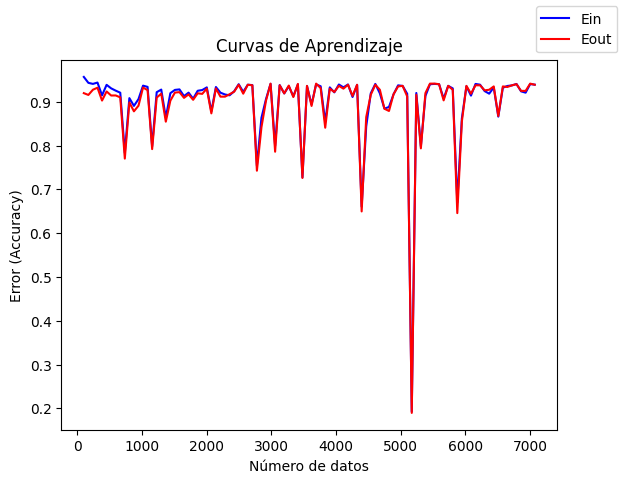

In [171]:
train_data = X_train.to_numpy()
train_labels = y_train.to_numpy().flatten()
indices = np.arange(train_data.shape[0])
index_yes = np.array([indice for indice in indices if train_labels[indice] == 1])
index_no = np.array([indice for indice in indices if train_labels[indice] == 0])
np.random.shuffle(index_yes)
np.random.shuffle(index_no)

index_yes_train = index_yes[int(len(index_yes)*0.1):]
index_yes_test = index_yes[:int(len(index_yes)*0.1)]
index_no_train = index_no[int(len(index_no)*0.1):]
index_no_test = index_no[:int(len(index_no)*0.1)]

index_train = np.append( index_yes_train, index_no_train )
index_test = np.append( index_yes_test, index_no_test )

porcion_yes_train = index_yes_train.shape[0] / index_train.shape[0]
porcion_no_train = index_no_train.shape[0] / index_train.shape[0]

curva_validacion_data = train_data[index_test]
curva_validacion_labels = train_labels[index_test]
curva_data = train_data[index_train]
curva_labels = train_labels[index_train]

indices = np.arange(curva_data.shape[0])
index_yes = np.array([indice for indice in indices if curva_labels[indice] == 1])
index_no = np.array([indice for indice in indices if curva_labels[indice] == 0])

eins = []
eouts = []
x = np.linspace(100, curva_data.shape[0],100)

for num_datos in x:
  num_it = int(curva_data.shape[0] / num_datos)
  ein = 0
  eout = 0
  for i in range(num_it):
    np.random.shuffle(index_yes)
    np.random.shuffle(index_no)
    index_yes_train = index_yes[:int(num_datos*porcion_yes_train)]
    index_no_train = index_no[:int(num_datos*porcion_no_train)]

    index_train = np.append( index_yes_train, index_no_train )
    train_x = curva_data[index_train]
    train_y = curva_labels[index_train]

    w = Perceptron(max_iter=max_iter3, early_stopping=True, n_jobs=-1, penalty='l2', alpha=alpha, eta0=eta0, class_weight=None).fit(train_x,train_y)
    ein += metrics.accuracy_score(train_y, w.predict(train_x))
    eout += metrics.accuracy_score(curva_validacion_labels, w.predict(curva_validacion_data))

  eins.append(ein/num_it)
  eouts.append(eout/num_it)

fig, ax = plt.subplots()

ax.plot(x, eins, 'b-', label='Ein')
ax.plot(x, eouts, 'r-', label='Eout')
ax.set_title('Curvas de Aprendizaje')
ax.set_xlabel('Número de datos')
ax.set_ylabel('Error (Accuracy)');

fig.legend()
fig.show()

Las curvas de aprendizaje que estamos observando parecen indicar la presencia de inconsistencia y aleatoriedad en el algoritmo del perceptrón. Es evidente que este algoritmo no garantiza un aumento en la calidad de los resultados a medida que se incrementa el número de datos. De hecho, como podemos ver en la gráfica, es posible afirmar que la calidad de nuestros resultados está influenciada en cierta medida por la aleatoriedad.

Es importante destacar que el perceptrón es un algoritmo simple y lineal que no tiene en cuenta la complejidad de los datos o la presencia de relaciones no lineales. Por lo tanto, su rendimiento puede ser limitado en situaciones donde la naturaleza de los datos es más compleja.

Es posible que para obtener resultados más consistentes y de mayor calidad, sea necesario utilizar algoritmos más avanzados que tengan en cuenta la complejidad y la variabilidad de los datos.

## <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos. 

Basándonos en el enfoque seguido en esta práctica, se ha realizado la selección del modelo considerado más apropiado. Para evaluar la capacidad de generalización de dicho modelo, se ha empleado la aproximación de Eout utilizando Etest, lo cual brinda una medida confiable. A pesar de que esta aproximación implica una reducción en el tamaño del conjunto de entrenamiento, no ha supuesto un problema debido a la abundancia de ejemplos disponibles.

Asimismo, se han considerado otras alternativas para obtener Eout, como emplear el conjunto de datos de entrenamiento (Ein) o calcular un promedio de los errores de validación (Ecv). Sin embargo, estas opciones no se acercan tanto a la obtención de Eout a partir de un conjunto de prueba lo suficientemente amplio. Estas prácticas suelen emplearse cuando los datos son escasos o valiosos, y no es factible destinar una parte del conjunto de entrenamiento para pruebas. En nuestro caso, esto no ha sido necesario.

Por otro lado, la validación cruzada nos permite probar y evaluar la calidad del modelo seleccionado, lo que resulta conveniente en la mayoría de los casos. Solo se puede obviar en situaciones en las que los tiempos de ejecución sean extremadamente largos, como horas o días, especialmente si los conjuntos de datos son lo suficientemente grandes como para obtener resultados confiables. A esto se le conoce como "hold-out".

La elección de cómo realizar la validación generalmente se reduce a seleccionar el número de particiones a utilizar. En general, la validación cruzada de 5 particiones (5-CV) es comúnmente utilizada debido a su fiabilidad demostrada a lo largo del tiempo y la experiencia acumulada. No obstante, siempre depende del conjunto de datos en cuestión, por lo que es necesario tener en cuenta algunos aspectos:

+ Menos particiones implican una menor seguridad obtenida y validaciones con conjuntos más pequeños. Por lo tanto, en conjuntos de datos relativamente grandes y costosos en términos de tiempo, a veces se opta por utilizar un 3-CV o incluso un 1-CV.

+ Por otro lado, utilizar más particiones aumenta la seguridad de que la calidad del modelo sea real y no simplemente producto de la aleatoriedad. Sin embargo, también se incrementa el tiempo de ejecución debido al mayor número de validaciones requeridas. Este enfoque suele emplearse cuando los conjuntos de datos son pequeños o cuando no se va a utilizar un conjunto de prueba, por lo que el cálculo de Eout se basará en Ecv. En casos extremos, se puede utilizar la técnica de "leave-one-out", donde se realizan tantas particiones como datos disponibles, entrenando en cada iteración con casi todos los datos y validando con un solo dato. Esta técnica se utiliza cuando hay muy pocos datos y no se puede destinar una partición para el conjunto de prueba, y se requiere la máxima precisión posible.

Dado que no tenemos restricciones de tiempo y disponemos de una cantidad generosa de ejemplos, no es necesario disminuir ni aumentar el número de particiones. La validación cruzada de 5 particiones será una elección adecuada en nuestro caso.

Después de seguir el proceso en esta práctica, se ha obtenido una solución con un Eout de 25.13% en términos de Misclassification rate. Sin embargo, es importante mencionar que también se debe tener en cuenta la puntuación, sobre todo la sensitivity, que son los 1's bien clasificados.

Dado que nuestro modelo usa una base de datos bastante desbalanceada, la clave sería ajustar el modelo de forma que se ajustara a las necesidades de la empresa. A lo mejor, es más catastrófico predecir los 1's mal que los 0's, o hay una cierta tregua en este aspecto.

## REFLEXIONES FINALES

A modo de reflexión, se puede observar que el proceso de selección, ajuste y entrenamiento de un modelo no es en absoluto sencillo. Es un proceso complejo y extenso que, además, no garantiza resultados favorables.

Existen numerosos aspectos a considerar y decisiones que tomar, lo cual hace prácticamente imposible elegir las mejores opciones. No es factible probar todas las opciones disponibles (por ejemplo, las infinitas transformaciones de datos posibles) y, aunque tengamos conocimientos, muchas decisiones no pueden basarse en evidencia empírica. Por lo tanto, debemos esforzarnos en obtener los mejores resultados posible, teniendo en cuenta el tiempo, las pruebas, el conocimiento, las heurísticas y, a veces, incluso la intuición.

Si tuviera más tiempo, sería recomendable realizar más mejoras y pruebas, como:
+ Tratar los valores atípicos (outliers).

+ Experimentar con las transformaciones hechas (normalizar de otra manera, hacer one-hot a todas las categóricas, etc).

+ Probar con diferentes parámetros o implementaciones para la regresión logística, especialmente variando los pesos de las clases.

+ Intentar crear un conjunto de datos sin desequilibrio de clases y entrenar el modelo con ese conjunto.

+ Por último, también se debería haber explorado la modificación del parámetro "Average" en SGDRegressor, ya que este valor se relaciona con el tamaño del mini-lote. Se recomienda encarecidamente probar diferentes valores de este parámetro en GridSearch o posteriormente.

+ Subir el número máximo de iteraciones, ya que han saltado numerosos warnings con respecto a esto.

En última instancia, este problema se caracteriza por su complejidad infinita y la ausencia de una única forma correcta de abordarlo.